# <span style="color:skyblue">Exchange Rate Prediction</span>

### <span style="color:dodgerblue">Importing Libraries to be Used</span>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

### <span style="color:dodgerblue">Project Objective</span>

This Python project is a data science application aimed at predicting the future values of exchange rates. It is developed to analyze and forecast complex changes in financial markets. The main objectives of the project are as follows: Data Collection and Preparation, Exploratory Data Analysis (EDA), Development of Machine Learning Models, Evaluation of Model Performance.

### <span style="color:dodgerblue">Column Descriptions</span>

Date: The date on which the financial data is recorded.

Open: The opening price of a financial instrument on a given date.

High: The highest price reached by a financial instrument during a specific time period.

Low: The lowest price reached by a financial instrument during a specific time period.

Close: The closing price of a financial instrument on a given date.

Adj Close: The adjusted closing price, which accounts for events such as dividends or stock splits.

Volume: The total number of shares or contracts traded during a specific time period.

### <span style="color:dodgerblue">To Examine The Dataset</span>

In [33]:
df = pd.read_csv("TRY=X.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,1.781800,1.781800,1.781800,1.781800,1.781800,0.0
1,2013-01-02,1.781400,1.782000,1.774000,1.781400,1.781400,0.0
2,2013-01-03,1.777780,1.782500,1.776480,1.777780,1.777780,0.0
3,2013-01-04,1.785600,1.790530,1.783640,1.784200,1.784200,0.0
4,2013-01-07,1.780580,1.786240,1.779000,1.780480,1.780480,0.0
...,...,...,...,...,...,...,...
2881,2024-01-17,30.118099,30.137100,30.093639,30.118099,30.118099,0.0
2882,2024-01-18,30.137819,30.193399,30.120899,30.137819,30.137819,0.0
2883,2024-01-19,30.153601,30.196899,30.129629,30.153601,30.153601,0.0
2884,2024-01-22,30.191360,30.258301,30.184259,30.191360,30.191360,0.0


In [34]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,1.78180,1.78180,1.78180,1.78180,1.78180,0.0
1,2013-01-02,1.78140,1.78200,1.77400,1.78140,1.78140,0.0
2,2013-01-03,1.77778,1.78250,1.77648,1.77778,1.77778,0.0
3,2013-01-04,1.78560,1.79053,1.78364,1.78420,1.78420,0.0
4,2013-01-07,1.78058,1.78624,1.77900,1.78048,1.78048,0.0


In [35]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2881,2024-01-17,30.118099,30.137100,30.093639,30.118099,30.118099,0.0
2882,2024-01-18,30.137819,30.193399,30.120899,30.137819,30.137819,0.0
2883,2024-01-19,30.153601,30.196899,30.129629,30.153601,30.153601,0.0
2884,2024-01-22,30.191360,30.258301,30.184259,30.191360,30.191360,0.0
2885,2024-01-23,30.262800,30.288000,30.142000,30.274960,30.274960,0.0


In [36]:
df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2707,2023-05-18,19.76440,19.803499,19.70347,19.76440,19.76440,0.0
241,2013-12-04,2.04345,2.050930,2.03970,2.04211,2.04211,0.0
1791,2019-11-13,5.77400,5.776100,5.73188,5.77169,5.77169,0.0
828,2016-03-04,2.91002,2.925020,2.90501,2.90997,2.90997,0.0
364,2014-05-26,2.07933,2.088610,2.07850,2.07933,2.07933,0.0


In [37]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

### <span style="color:dodgerblue">Understanding Variables</span>

In [38]:
df.shape

(2886, 7)

In [39]:
len(df)

2886

In [40]:
df.size

20202

In [41]:
df.index

RangeIndex(start=0, stop=2886, step=1)

In [42]:
df.nunique()

Date         2886
Open         2860
High         2866
Low          2844
Close        2866
Adj Close    2866
Volume          1
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2886 non-null   object 
 1   Open       2882 non-null   float64
 2   High       2882 non-null   float64
 3   Low        2882 non-null   float64
 4   Close      2882 non-null   float64
 5   Adj Close  2882 non-null   float64
 6   Volume     2882 non-null   float64
dtypes: float64(6), object(1)
memory usage: 158.0+ KB


In [44]:
dtypes = pd.DataFrame(df.dtypes, columns = ['dtypes'])
dtypes

,dtypes
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,float64


In [45]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.0
mean,7.421892,7.466604,7.388040,7.422184,7.422184,0.0
std,6.946677,6.976985,6.924467,6.946689,6.946689,0.0
min,1.747420,1.758700,1.745900,1.748370,1.748370,0.0
25%,2.864002,2.877750,2.855892,2.863500,2.863500,0.0
50%,4.787165,4.845610,4.752125,4.787000,4.787000,0.0
75%,8.266337,8.327458,8.225240,8.269780,8.269780,0.0
max,30.262800,30.306299,30.184259,30.274960,30.274960,0.0


In [46]:
df.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

<Figure size 1000x500 with 0 Axes>

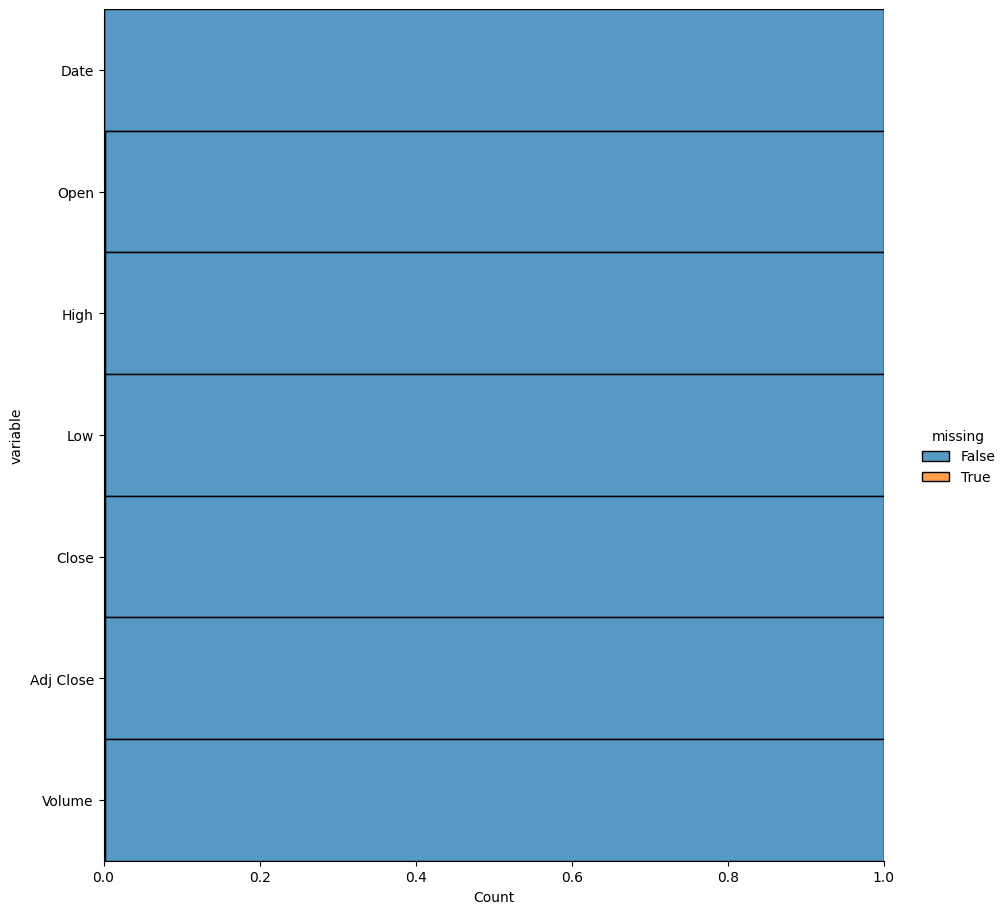

In [47]:
plt.figure(figsize = (10, 5))

sns.displot(
    data = df.isnull().melt(value_name = "missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    height = 9.25)

plt.show()

### <span style="color:dodgerblue">Preparing the Dataset</span>

In [48]:
df["Open"]=df["Open"].interpolate().astype(float)
df["Open"]

0        1.781800
1        1.781400
2        1.777780
3        1.785600
4        1.780580
          ...    
2881    30.118099
2882    30.137819
2883    30.153601
2884    30.191360
2885    30.262800
Name: Open, Length: 2886, dtype: float64

In [49]:
df["High"]=df["High"].interpolate().astype(float)
df["High"]

0        1.781800
1        1.782000
2        1.782500
3        1.790530
4        1.786240
          ...    
2881    30.137100
2882    30.193399
2883    30.196899
2884    30.258301
2885    30.288000
Name: High, Length: 2886, dtype: float64

In [50]:
df["Low"]=df["Low"].interpolate().astype(float)
df["Low"]

0        1.781800
1        1.774000
2        1.776480
3        1.783640
4        1.779000
          ...    
2881    30.093639
2882    30.120899
2883    30.129629
2884    30.184259
2885    30.142000
Name: Low, Length: 2886, dtype: float64

In [51]:
df["Close"]=df["Close"].interpolate().astype(float)
df["Close"]

0        1.781800
1        1.781400
2        1.777780
3        1.784200
4        1.780480
          ...    
2881    30.118099
2882    30.137819
2883    30.153601
2884    30.191360
2885    30.274960
Name: Close, Length: 2886, dtype: float64

In [52]:
df["Adj Close"]=df["Adj Close"].interpolate().astype(float)
df["Adj Close"]

0        1.781800
1        1.781400
2        1.777780
3        1.784200
4        1.780480
          ...    
2881    30.118099
2882    30.137819
2883    30.153601
2884    30.191360
2885    30.274960
Name: Adj Close, Length: 2886, dtype: float64

In [53]:
df["Volume"]=df["Volume"].interpolate().astype(float)
df["Volume"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2881    0.0
2882    0.0
2883    0.0
2884    0.0
2885    0.0
Name: Volume, Length: 2886, dtype: float64

In [54]:
df = df.dropna()

In [55]:
df.duplicated().value_counts()

False    2886
Name: count, dtype: int64

In [56]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [57]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [58]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2013-01-01,1.781800,1.781800,1.781800,1.781800,1.781800,0.0,2013,1,1
1,2013-01-02,1.781400,1.782000,1.774000,1.781400,1.781400,0.0,2013,1,2
2,2013-01-03,1.777780,1.782500,1.776480,1.777780,1.777780,0.0,2013,1,3
3,2013-01-04,1.785600,1.790530,1.783640,1.784200,1.784200,0.0,2013,1,4
4,2013-01-07,1.780580,1.786240,1.779000,1.780480,1.780480,0.0,2013,1,7
...,...,...,...,...,...,...,...,...,...,...
2881,2024-01-17,30.118099,30.137100,30.093639,30.118099,30.118099,0.0,2024,1,17
2882,2024-01-18,30.137819,30.193399,30.120899,30.137819,30.137819,0.0,2024,1,18
2883,2024-01-19,30.153601,30.196899,30.129629,30.153601,30.153601,0.0,2024,1,19
2884,2024-01-22,30.191360,30.258301,30.184259,30.191360,30.191360,0.0,2024,1,22


In [59]:
# df_2024 = df[df['Year'] == 2024]

In [60]:
# df = df[df['Year'] != 2024]

In [61]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2013-01-01,1.781800,1.781800,1.781800,1.781800,1.781800,0.0,2013,1,1
1,2013-01-02,1.781400,1.782000,1.774000,1.781400,1.781400,0.0,2013,1,2
2,2013-01-03,1.777780,1.782500,1.776480,1.777780,1.777780,0.0,2013,1,3
3,2013-01-04,1.785600,1.790530,1.783640,1.784200,1.784200,0.0,2013,1,4
4,2013-01-07,1.780580,1.786240,1.779000,1.780480,1.780480,0.0,2013,1,7
...,...,...,...,...,...,...,...,...,...,...
2881,2024-01-17,30.118099,30.137100,30.093639,30.118099,30.118099,0.0,2024,1,17
2882,2024-01-18,30.137819,30.193399,30.120899,30.137819,30.137819,0.0,2024,1,18
2883,2024-01-19,30.153601,30.196899,30.129629,30.153601,30.153601,0.0,2024,1,19
2884,2024-01-22,30.191360,30.258301,30.184259,30.191360,30.191360,0.0,2024,1,22


In [62]:
# df_2024

In [63]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Year         0
Month        0
Day          0
dtype: int64

In [64]:
df['Date'] = pd.to_datetime(df['Date'])

In [65]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2013-01-01,1.781800,1.781800,1.781800,1.781800,1.781800,0.0,2013,1,1
1,2013-01-02,1.781400,1.782000,1.774000,1.781400,1.781400,0.0,2013,1,2
2,2013-01-03,1.777780,1.782500,1.776480,1.777780,1.777780,0.0,2013,1,3
3,2013-01-04,1.785600,1.790530,1.783640,1.784200,1.784200,0.0,2013,1,4
4,2013-01-07,1.780580,1.786240,1.779000,1.780480,1.780480,0.0,2013,1,7
...,...,...,...,...,...,...,...,...,...,...
2881,2024-01-17,30.118099,30.137100,30.093639,30.118099,30.118099,0.0,2024,1,17
2882,2024-01-18,30.137819,30.193399,30.120899,30.137819,30.137819,0.0,2024,1,18
2883,2024-01-19,30.153601,30.196899,30.129629,30.153601,30.153601,0.0,2024,1,19
2884,2024-01-22,30.191360,30.258301,30.184259,30.191360,30.191360,0.0,2024,1,22


### <span style="color:dodgerblue">Visualizing Data</span>

In [66]:
def first_look(col):
    print('column name : ', col)
    print('--------------------------------')
    print('Per_of_Nulls   : ', '%', round(df[col].isnull().sum() / df.shape[0]*100, 2))
    print('Num_of_Nulls   : ', df[col].isnull().sum())
    print('Num_of_Uniques : ', df[col].nunique())
    print('Duplicates     : ', df.duplicated(subset = None, keep = 'first').sum())
    print(df[col].value_counts(dropna = False).sort_index())

In [67]:
numerical= df.select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print('---------------------')
print(f'Numerical Columns:  {df[numerical].columns}')
print('---------------------')
print(f'Categorical Columns: {df[categorical].columns}')
print('---------------------')

---------------------
Numerical Columns:  Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year', 'Month',
       'Day'],
      dtype='object')
---------------------
Categorical Columns: Index([], dtype='object')
---------------------


In [68]:
numerical

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year', 'Month',
       'Day'],
      dtype='object')

In [69]:
categorical

Index([], dtype='object')

In [70]:
df.describe(include = 'all')

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
count,2886,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.0,2886.000000,2886.000000,2886.000000
mean,2018-07-13 02:24:11.975052032,7.416994,7.461672,7.383163,7.417286,7.417286,0.0,2018.033264,6.489951,15.704782
min,2013-01-01 00:00:00,1.747420,1.758700,1.745900,1.748370,1.748370,0.0,2013.000000,1.000000,1.000000
25%,2015-10-07 06:00:00,2.864002,2.877750,2.855892,2.863500,2.863500,0.0,2015.000000,3.000000,8.000000
50%,2018-07-12 12:00:00,4.767315,4.841940,4.736085,4.767005,4.767005,0.0,2018.000000,7.000000,16.000000
75%,2021-04-18 06:00:00,8.256863,8.323438,8.222525,8.263440,8.263440,0.0,2021.000000,9.750000,23.000000
max,2024-01-23 00:00:00,30.262800,30.306299,30.184259,30.274960,30.274960,0.0,2024.000000,12.000000,31.000000
std,NaN,6.943316,6.973617,6.921113,6.943328,6.943328,0.0,3.185801,3.464462,8.795707


In [71]:
first_look('Date')

column name :  Date
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  2886
Duplicates     :  0
Date
2013-01-01    1
2013-01-02    1
2013-01-03    1
2013-01-04    1
2013-01-07    1
             ..
2024-01-17    1
2024-01-18    1
2024-01-19    1
2024-01-22    1
2024-01-23    1
Name: count, Length: 2886, dtype: int64


In [72]:
df['Date'].sample(20)

163    2013-08-16
1474   2018-08-27
493    2014-11-21
340    2014-04-22
2436   2022-05-04
1708   2019-07-19
137    2013-07-11
980    2016-10-04
2057   2020-11-19
55     2013-03-19
1851   2020-02-05
87     2013-05-02
1597   2019-02-14
362    2014-05-22
1216   2017-08-30
2800   2023-09-26
1886   2020-03-25
2457   2022-06-02
403    2014-07-18
114    2013-06-10
Name: Date, dtype: datetime64[ns]

In [73]:
def show_distribution(col,title):
    

    min_val = col.min()
    max_val = col.max()
    mean_val = col.mean()
    med_val = col.median()
    mod_val = col.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

   
    fig, ax = plt.subplots(2, 1, figsize = (15,10))

    
    ax[0].hist(col)
    ax[0].set_ylabel('Values',fontsize=10)

    
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2, label='Minimum')
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2, label='Mean')
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2, label='Median')
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2, label='Mode')
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2, label='Maximum')
    ax[0].legend(loc='upper right')

      
    ax[1].boxplot(col, vert=False)
    ax[1].set_xlabel('value', fontsize=10)

    
    fig.suptitle(title, fontsize=15)

In [74]:
def show_density(col,baslik):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(15,5))

   
    col.plot.density()

    
    plt.title(baslik, fontsize=15)

    
    plt.axvline(x=col.mean(), color = 'cyan', linestyle='dashed', linewidth = 2, label = 'Mean')
    plt.axvline(x=col.median(), color = 'red', linestyle='dashed', linewidth = 2, label = 'Median')
    plt.axvline(x=col.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2, label = 'Mode')
    plt.legend()

    
    plt.show()

Minimum:1.75
Mean:7.42
Median:4.77
Mode:1.80
Maximum:30.26



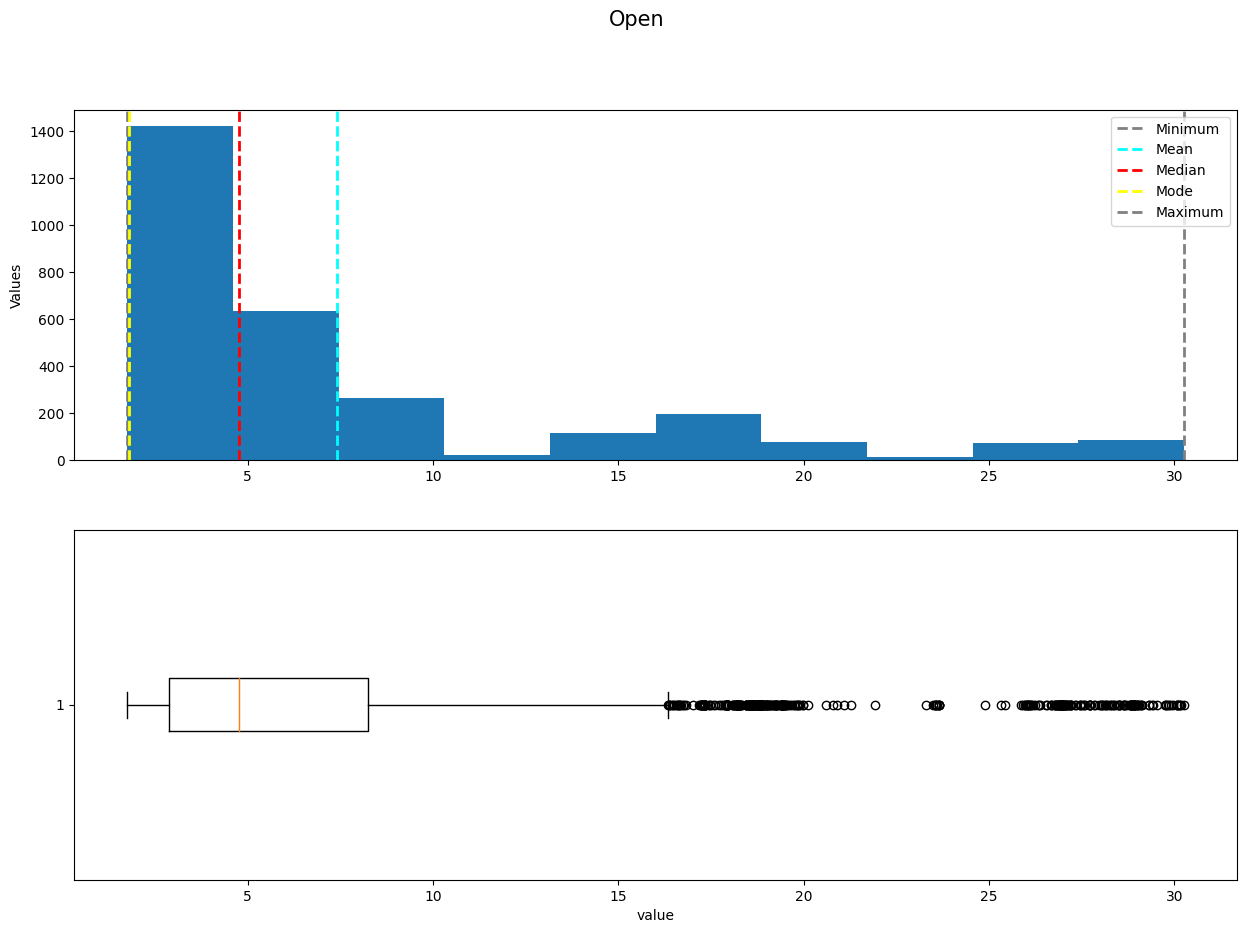

In [75]:
show_distribution(df['Open'],"Open")

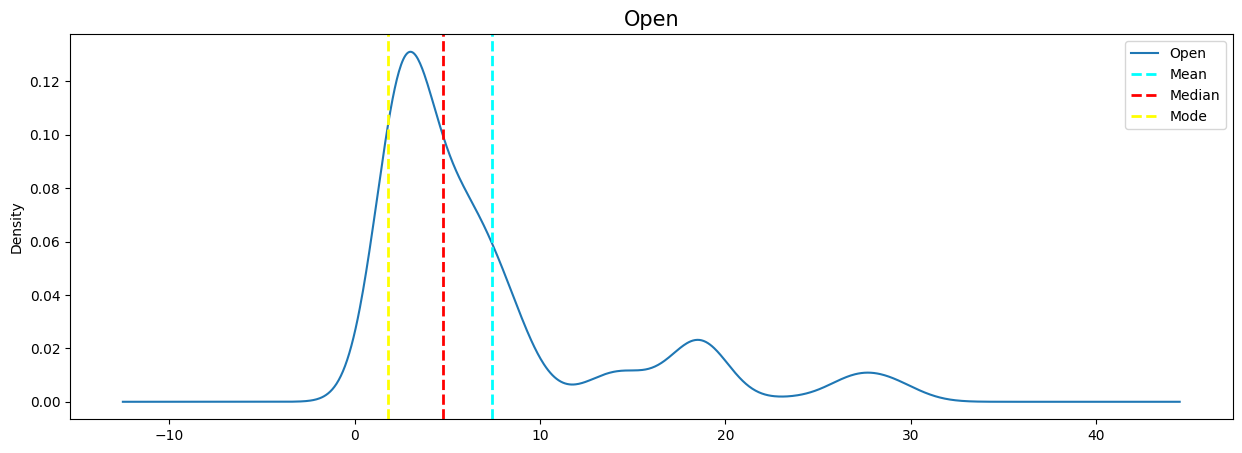

In [76]:
show_density(df['Open'],'Open')

Minimum:1.76
Mean:7.46
Median:4.84
Mode:2.24
Maximum:30.31



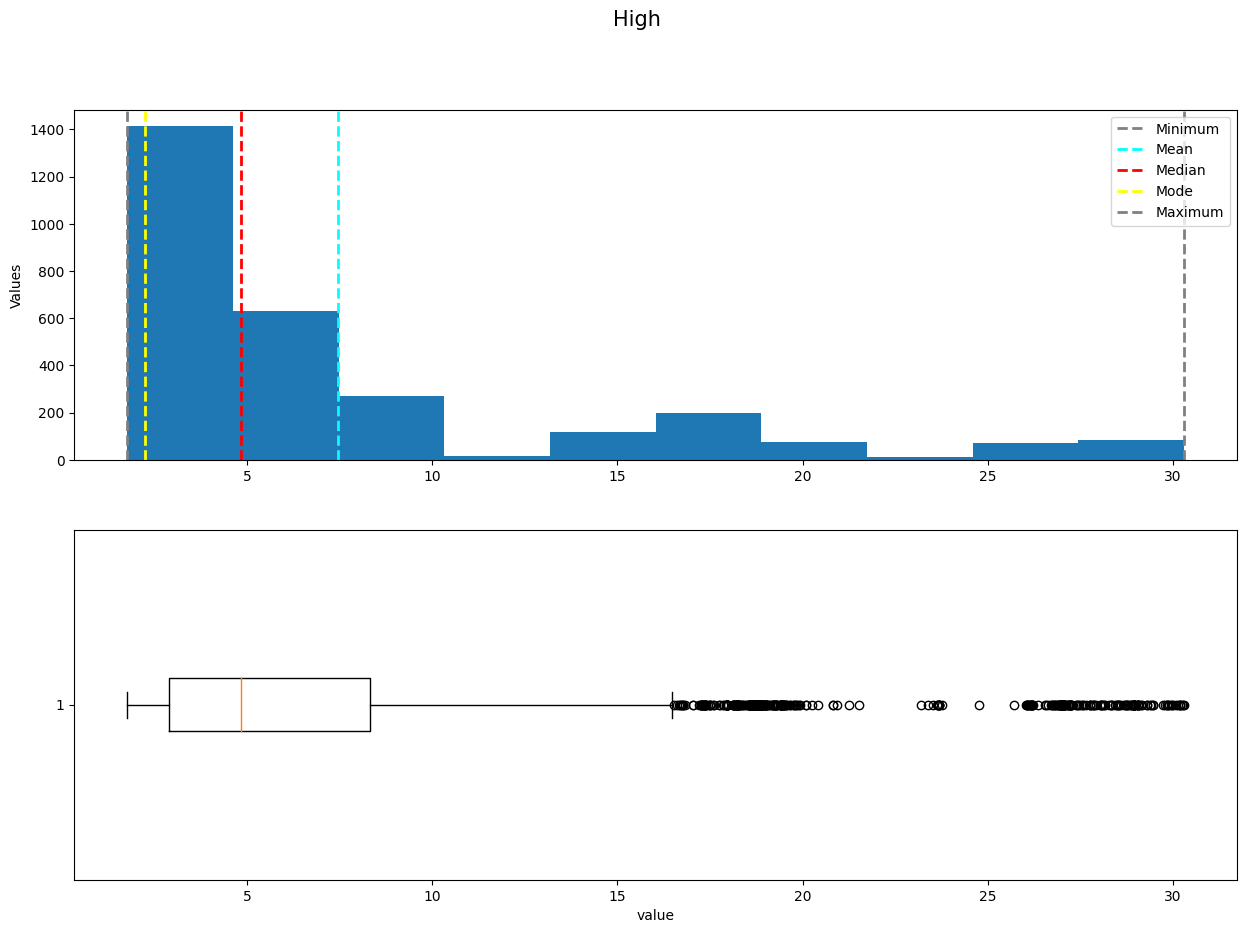

In [77]:
show_distribution(df['High'],"High")

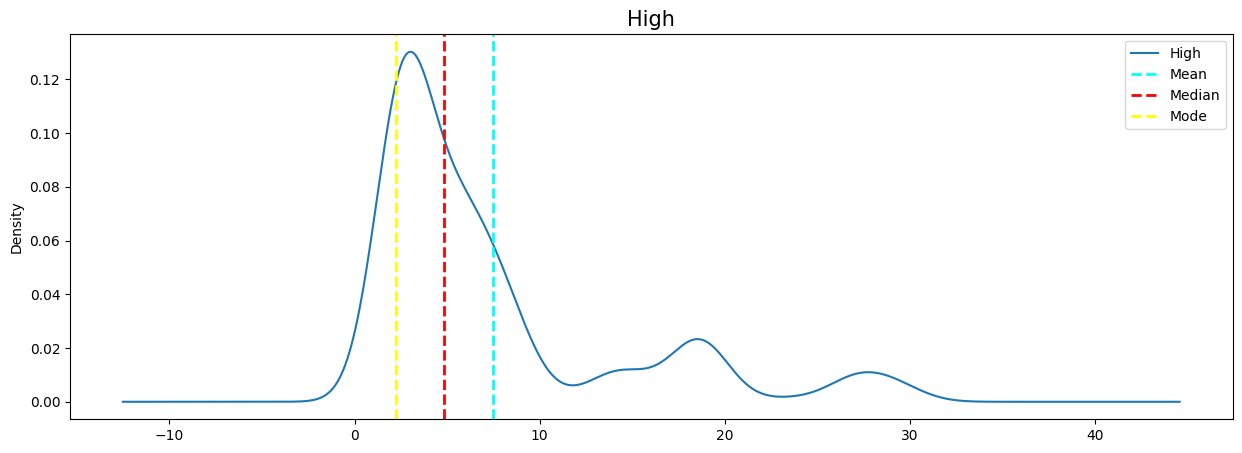

In [78]:
show_density(df['High'],'High')

Minimum:1.75
Mean:7.38
Median:4.74
Mode:2.23
Maximum:30.18



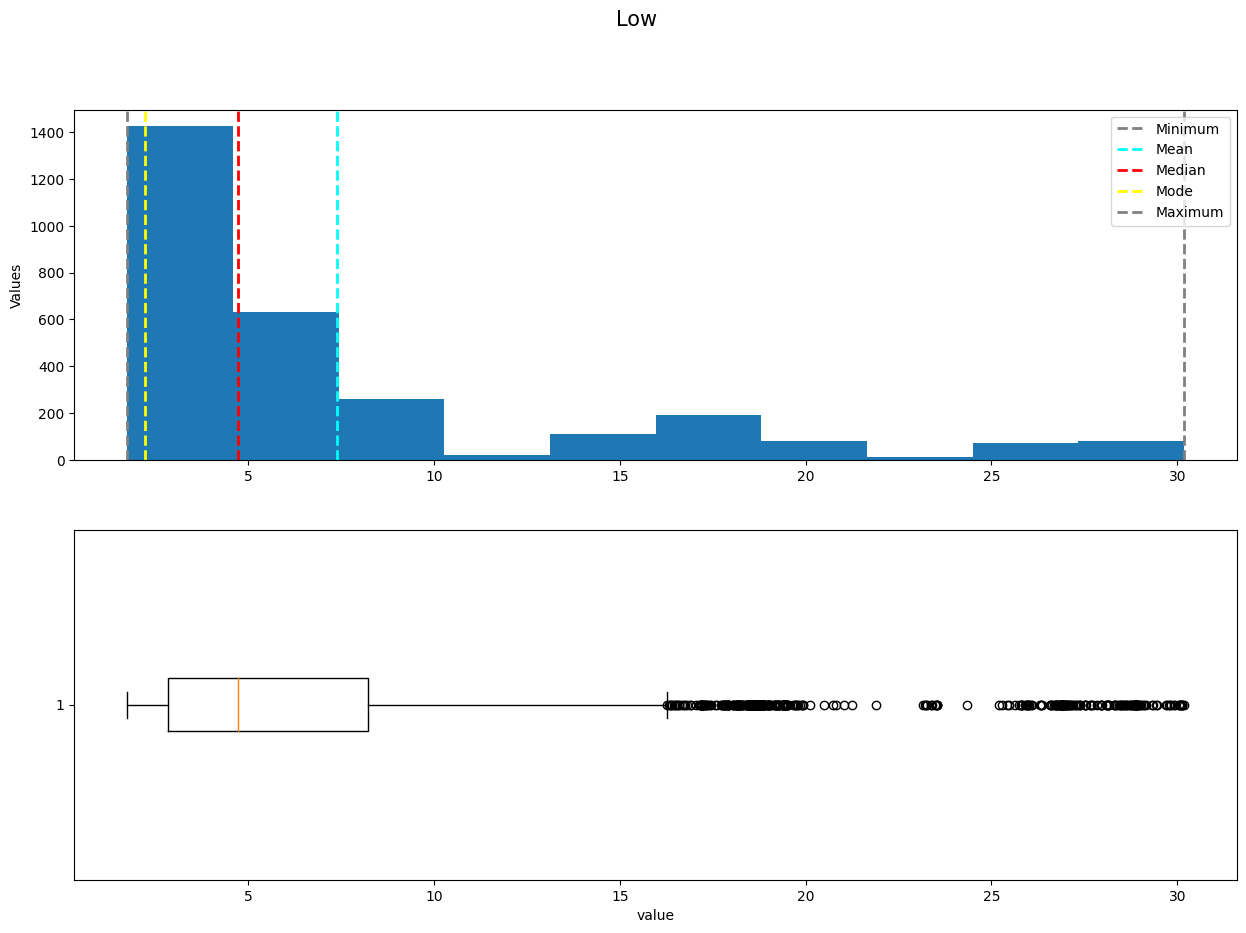

In [79]:
show_distribution(df['Low'],"Low")

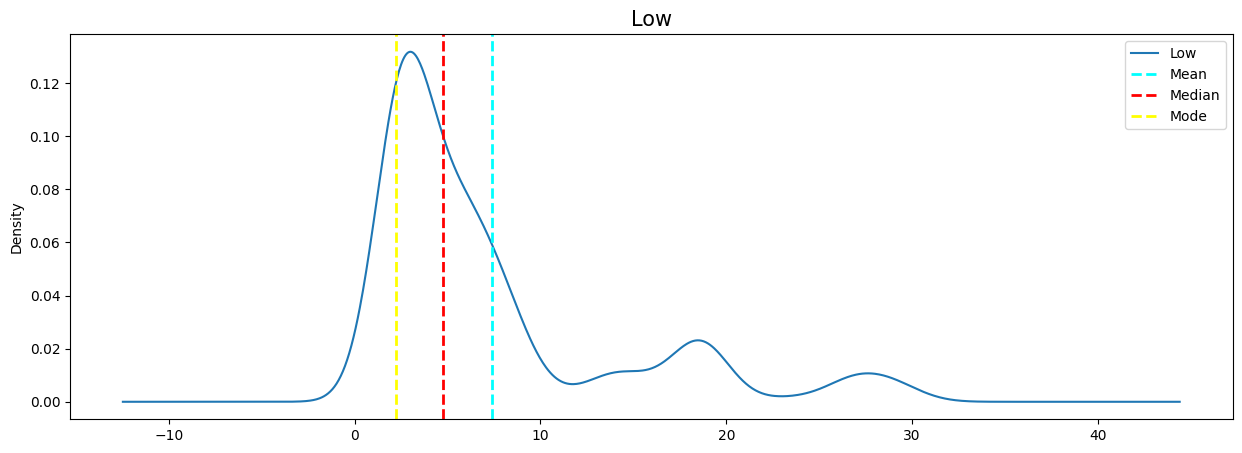

In [80]:
show_density(df['Low'],'Low')

Minimum:1.75
Mean:7.42
Median:4.77
Mode:1.80
Maximum:30.27



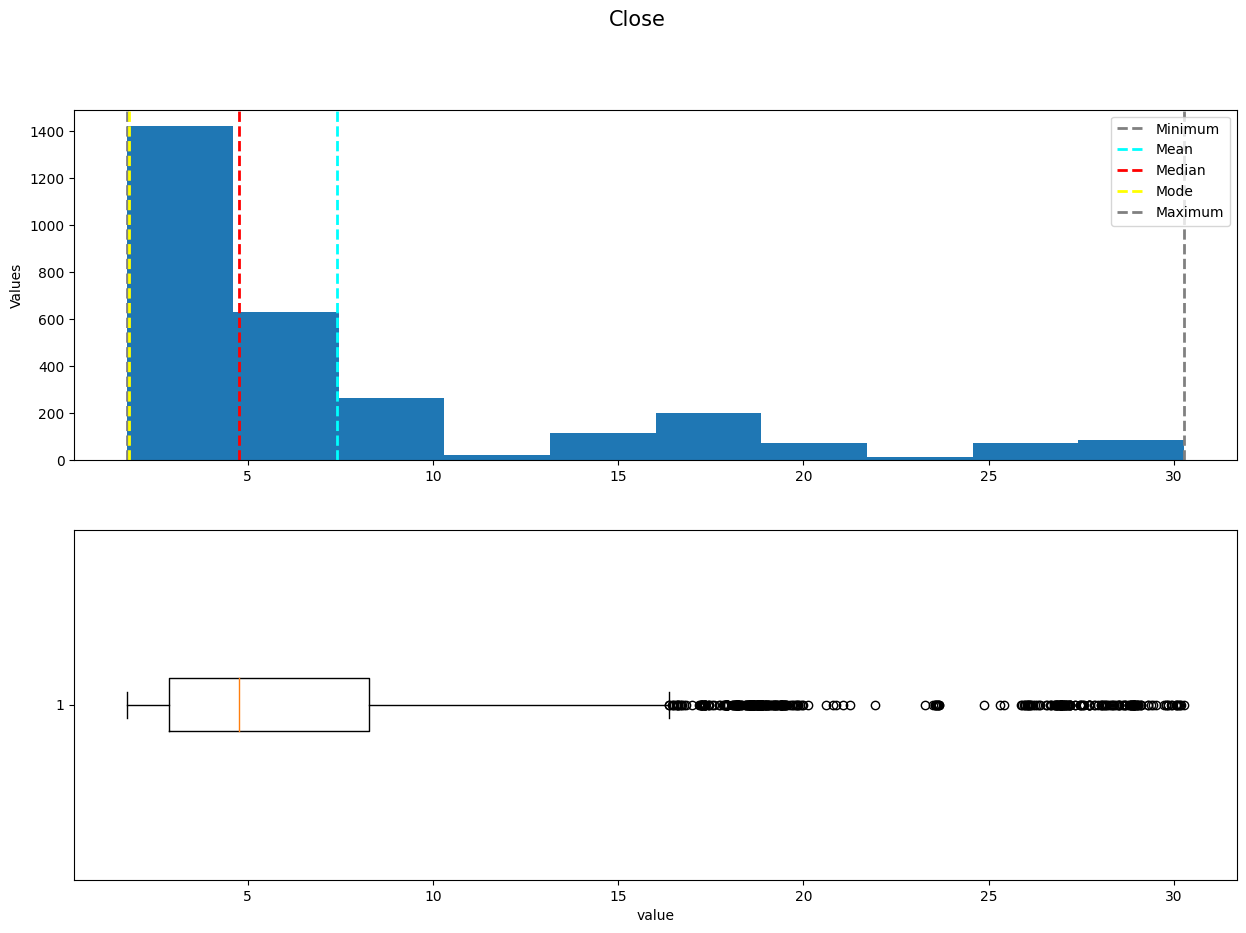

In [81]:
show_distribution(df['Close'],"Close")

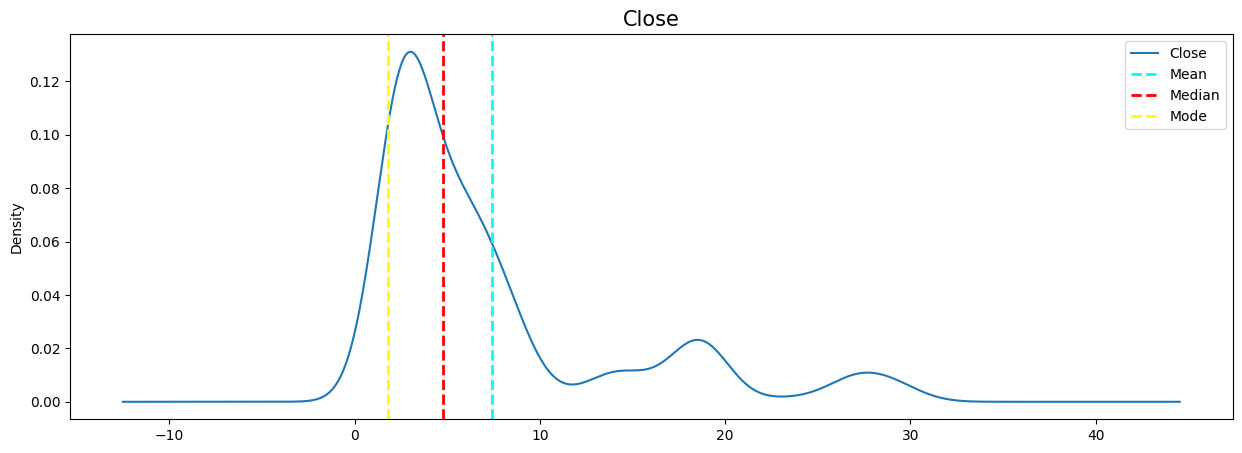

In [82]:
show_density(df['Close'],'Close')

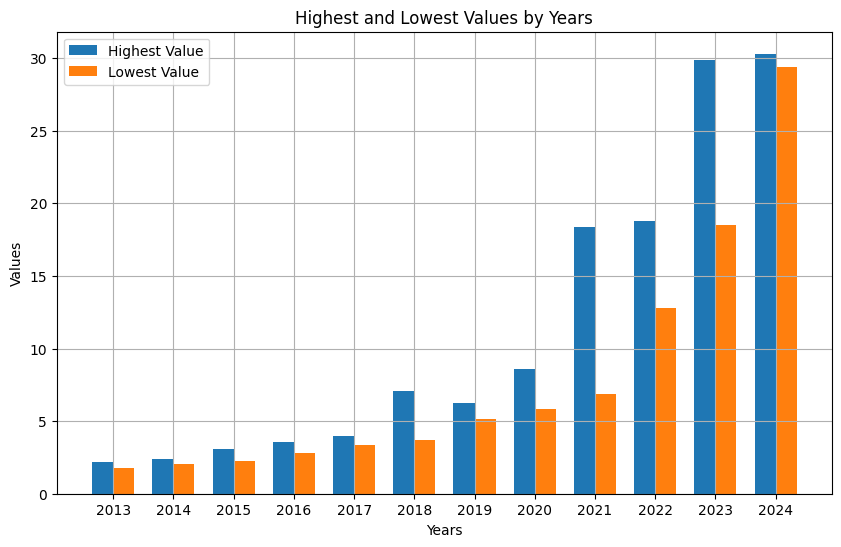

In [83]:
max_values = df.groupby('Year')['High'].max()
min_values = df.groupby('Year')['Low'].min()

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(max_values.index, max_values, bar_width, label='Highest Value')
plt.bar(min_values.index + bar_width, min_values, bar_width, label='Lowest Value')

plt.xlabel('Years')
plt.ylabel('Values')
plt.title('Highest and Lowest Values by Years')
plt.xticks(max_values.index + bar_width / 2, max_values.index)  
plt.legend()
plt.grid(True)

plt.show()

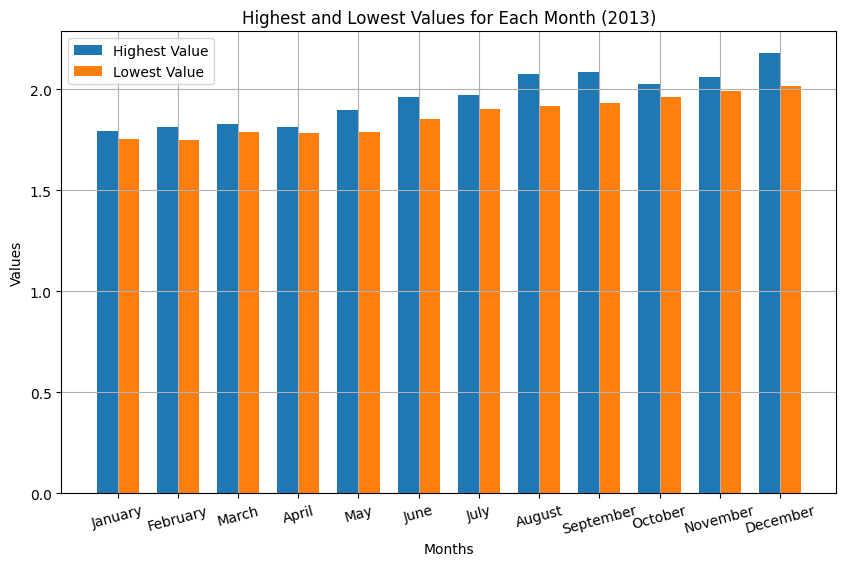

In [84]:
df_2013 = df[df['Year'] == 2013]

max_values = df_2013.groupby('Month')['High'].max()
min_values = df_2013.groupby('Month')['Low'].min()

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(max_values.index, max_values, bar_width, label='Highest Value')
plt.bar(min_values.index + bar_width, min_values, bar_width, label='Lowest Value')

plt.xlabel('Months')
plt.ylabel('Values')
plt.title('Highest and Lowest Values for Each Month (2013)')
plt.xticks(max_values.index + bar_width / 2, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'], rotation=15)
plt.legend()
plt.grid(True)

plt.show()

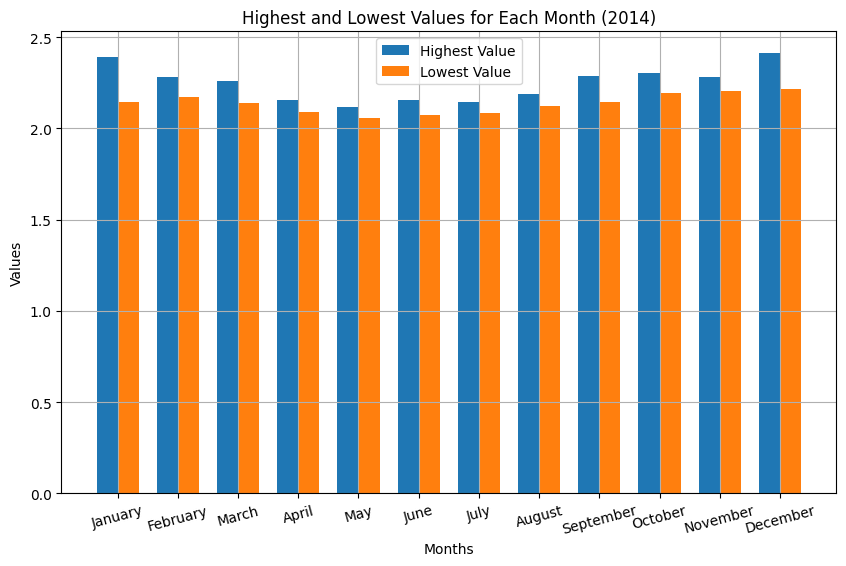

In [85]:
df_2014 = df[df['Year'] == 2014]

max_values = df_2014.groupby('Month')['High'].max()
min_values = df_2014.groupby('Month')['Low'].min()

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(max_values.index, max_values, bar_width, label='Highest Value')
plt.bar(min_values.index + bar_width, min_values, bar_width, label='Lowest Value')

plt.xlabel('Months')
plt.ylabel('Values')
plt.title('Highest and Lowest Values for Each Month (2014)')
plt.xticks(max_values.index + bar_width / 2, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'], rotation=15)
plt.legend()
plt.grid(True)

plt.show()

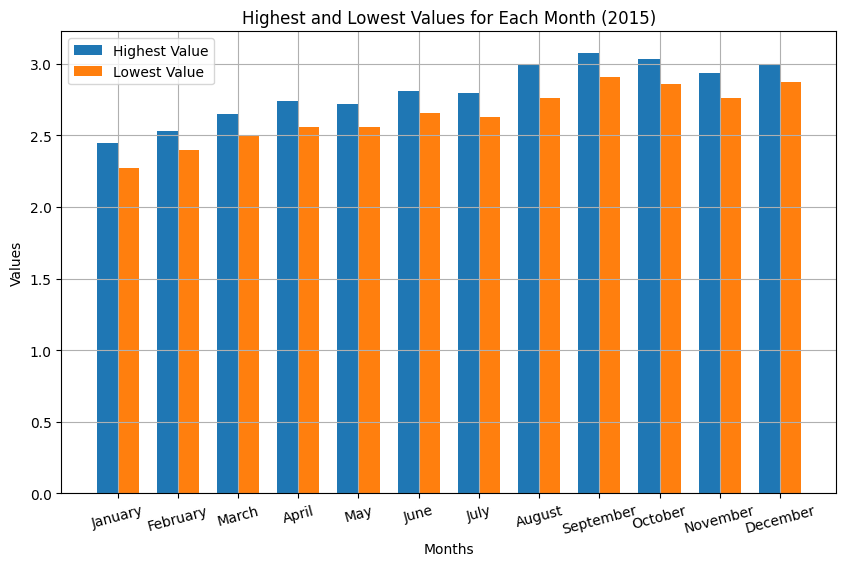

In [86]:
df_2015 = df[df['Year'] == 2015]

max_values = df_2015.groupby('Month')['High'].max()
min_values = df_2015.groupby('Month')['Low'].min()

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(max_values.index, max_values, bar_width, label='Highest Value')
plt.bar(min_values.index + bar_width, min_values, bar_width, label='Lowest Value')

plt.xlabel('Months')
plt.ylabel('Values')
plt.title('Highest and Lowest Values for Each Month (2015)')
plt.xticks(max_values.index + bar_width / 2, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'], rotation=15)
plt.legend()
plt.grid(True)

plt.show()

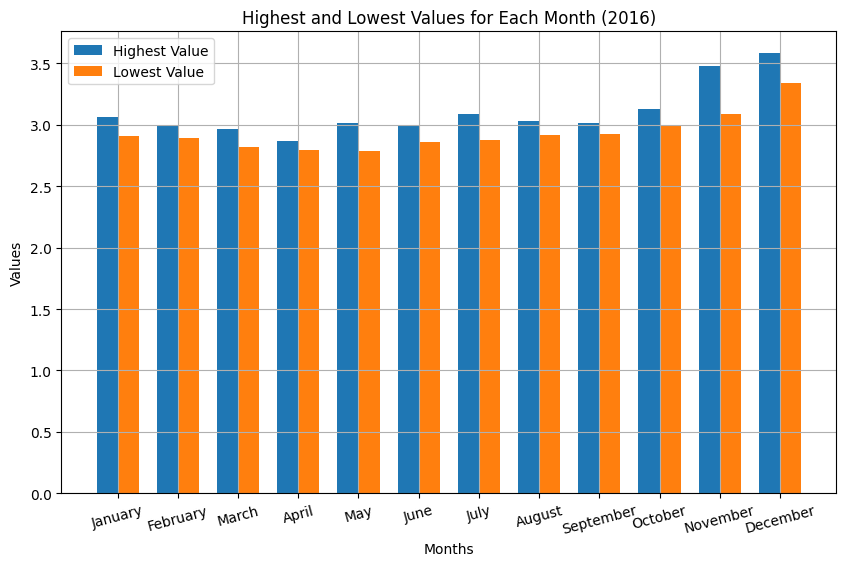

In [87]:
df_2016 = df[df['Year'] == 2016]

max_values = df_2016.groupby('Month')['High'].max()
min_values = df_2016.groupby('Month')['Low'].min()

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(max_values.index, max_values, bar_width, label='Highest Value')
plt.bar(min_values.index + bar_width, min_values, bar_width, label='Lowest Value')

plt.xlabel('Months')
plt.ylabel('Values')
plt.title('Highest and Lowest Values for Each Month (2016)')
plt.xticks(max_values.index + bar_width / 2, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'], rotation=15)
plt.legend()
plt.grid(True)

plt.show()

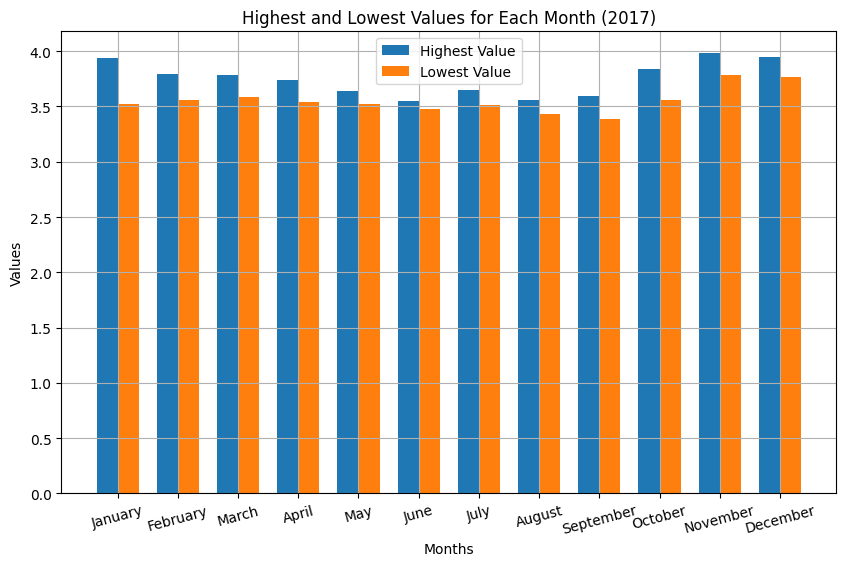

In [88]:
df_2017 = df[df['Year'] == 2017]

max_values = df_2017.groupby('Month')['High'].max()
min_values = df_2017.groupby('Month')['Low'].min()

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(max_values.index, max_values, bar_width, label='Highest Value')
plt.bar(min_values.index + bar_width, min_values, bar_width, label='Lowest Value')

plt.xlabel('Months')
plt.ylabel('Values')
plt.title('Highest and Lowest Values for Each Month (2017)')
plt.xticks(max_values.index + bar_width / 2, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'], rotation=15)
plt.legend()
plt.grid(True)

plt.show()

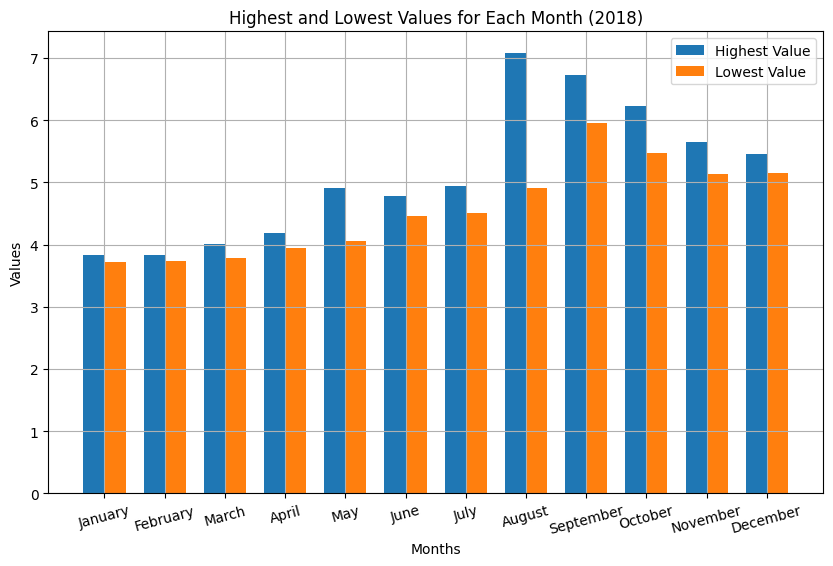

In [89]:
df_2018 = df[df['Year'] == 2018]

max_values = df_2018.groupby('Month')['High'].max()
min_values = df_2018.groupby('Month')['Low'].min()

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(max_values.index, max_values, bar_width, label='Highest Value')
plt.bar(min_values.index + bar_width, min_values, bar_width, label='Lowest Value')

plt.xlabel('Months')
plt.ylabel('Values')
plt.title('Highest and Lowest Values for Each Month (2018)')
plt.xticks(max_values.index + bar_width / 2, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'], rotation=15)
plt.legend()
plt.grid(True)

plt.show()

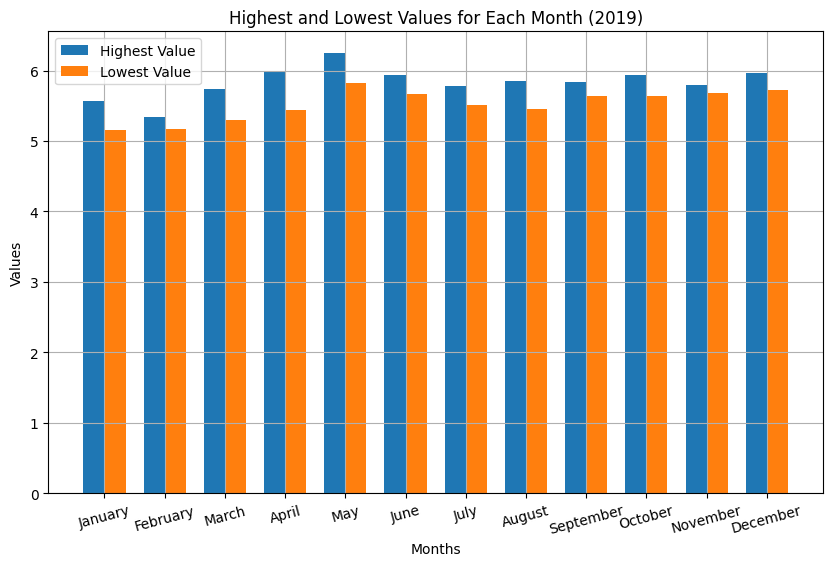

In [90]:
df_2019 = df[df['Year'] == 2019]

max_values = df_2019.groupby('Month')['High'].max()
min_values = df_2019.groupby('Month')['Low'].min()

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(max_values.index, max_values, bar_width, label='Highest Value')
plt.bar(min_values.index + bar_width, min_values, bar_width, label='Lowest Value')

plt.xlabel('Months')
plt.ylabel('Values')
plt.title('Highest and Lowest Values for Each Month (2019)')
plt.xticks(max_values.index + bar_width / 2, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'], rotation=15)
plt.legend()
plt.grid(True)

plt.show()

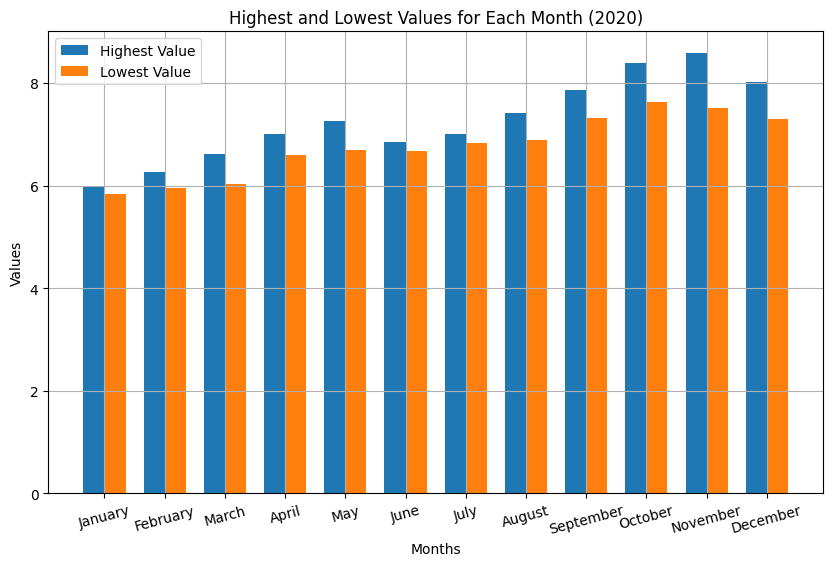

In [91]:
df_2020 = df[df['Year'] == 2020]

max_values = df_2020.groupby('Month')['High'].max()
min_values = df_2020.groupby('Month')['Low'].min()

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(max_values.index, max_values, bar_width, label='Highest Value')
plt.bar(min_values.index + bar_width, min_values, bar_width, label='Lowest Value')

plt.xlabel('Months')
plt.ylabel('Values')
plt.title('Highest and Lowest Values for Each Month (2020)')
plt.xticks(max_values.index + bar_width / 2, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'], rotation=15)
plt.legend()
plt.grid(True)

plt.show()

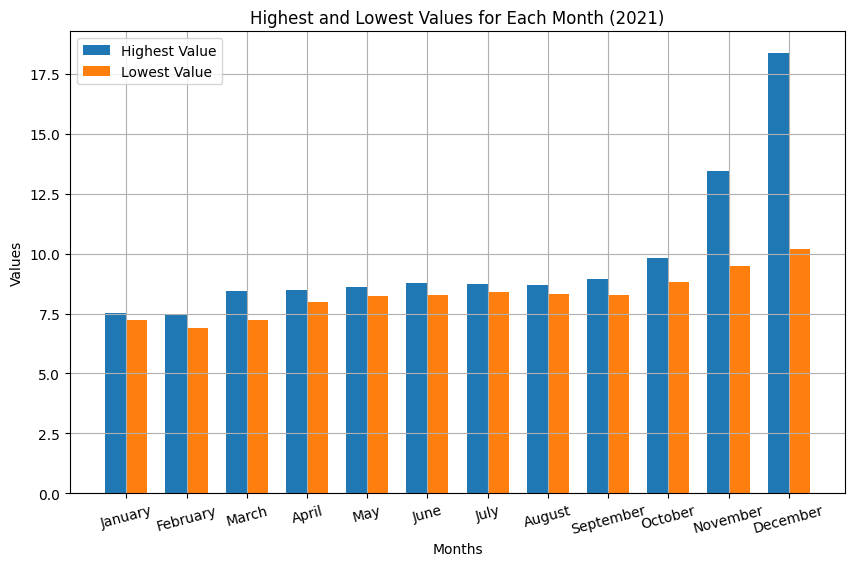

In [92]:
df_2021 = df[df['Year'] == 2021]

max_values = df_2021.groupby('Month')['High'].max()
min_values = df_2021.groupby('Month')['Low'].min()

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(max_values.index, max_values, bar_width, label='Highest Value')
plt.bar(min_values.index + bar_width, min_values, bar_width, label='Lowest Value')

plt.xlabel('Months')
plt.ylabel('Values')
plt.title('Highest and Lowest Values for Each Month (2021)')
plt.xticks(max_values.index + bar_width / 2, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'], rotation=15)
plt.legend()
plt.grid(True)

plt.show()

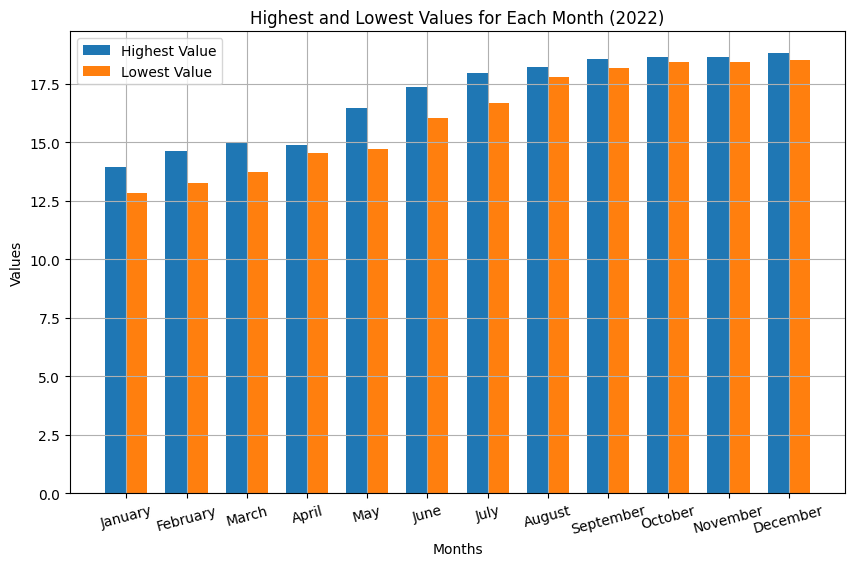

In [93]:
df_2022 = df[df['Year'] == 2022]

max_values = df_2022.groupby('Month')['High'].max()
min_values = df_2022.groupby('Month')['Low'].min()

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(max_values.index, max_values, bar_width, label='Highest Value')
plt.bar(min_values.index + bar_width, min_values, bar_width, label='Lowest Value')

plt.xlabel('Months')
plt.ylabel('Values')
plt.title('Highest and Lowest Values for Each Month (2022)')
plt.xticks(max_values.index + bar_width / 2, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'], rotation=15)
plt.legend()
plt.grid(True)

plt.show()

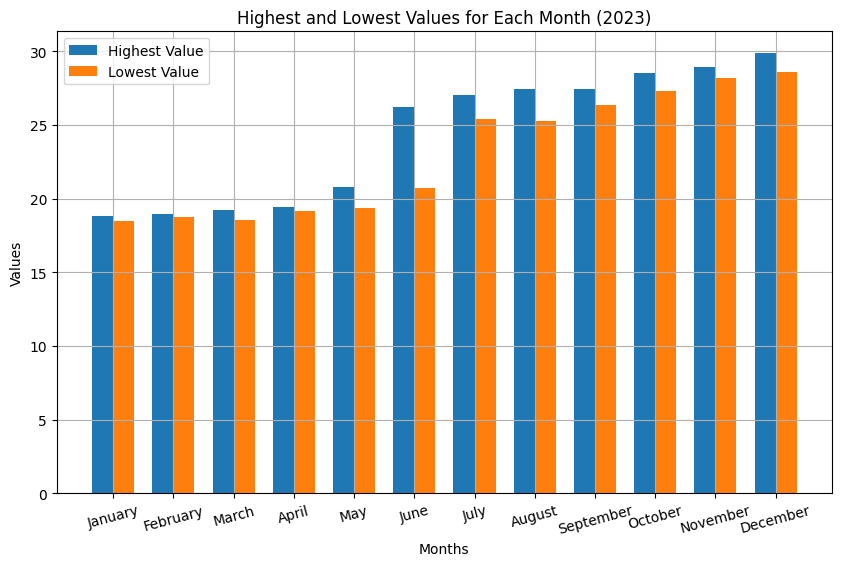

In [94]:
df_2023 = df[df['Year'] == 2023]

max_values = df_2023.groupby('Month')['High'].max()
min_values = df_2023.groupby('Month')['Low'].min()

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(max_values.index, max_values, bar_width, label='Highest Value')
plt.bar(min_values.index + bar_width, min_values, bar_width, label='Lowest Value')

plt.xlabel('Months')
plt.ylabel('Values')
plt.title('Highest and Lowest Values for Each Month (2023)')
plt.xticks(max_values.index + bar_width / 2, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'], rotation=15)
plt.legend()
plt.grid(True)

plt.show()

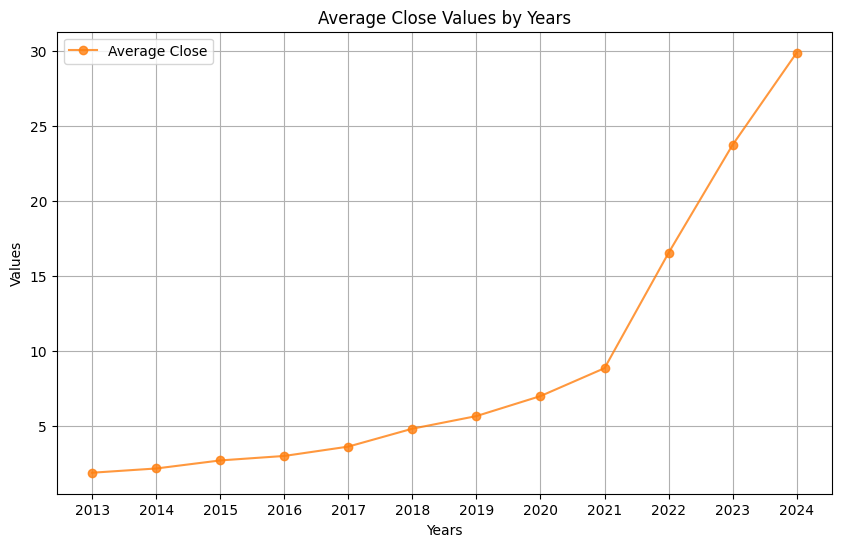

In [95]:
average_values = df.groupby('Year')[['Close']].mean()

plt.figure(figsize=(10, 6))

plt.plot(average_values.index, average_values['Close'], marker='o', color='tab:orange',  alpha=0.8, label='Average Close')

plt.xlabel('Years')
plt.ylabel('Values')
plt.title('Average Close Values by Years')
plt.xticks(average_values.index)
plt.legend()
plt.grid(True)

plt.show()

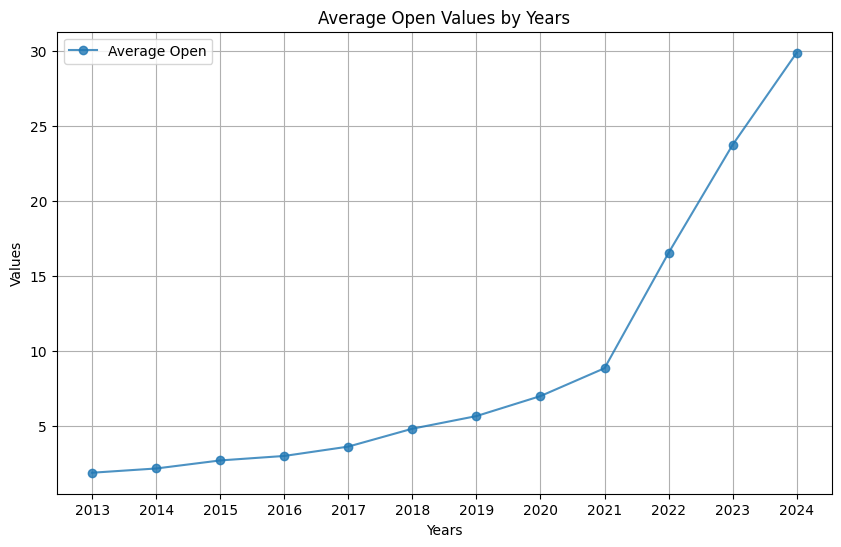

In [96]:
average_values = df.groupby('Year')[['Open', 'Close']].mean()

plt.figure(figsize=(10, 6))

plt.plot(average_values.index, average_values['Open'], marker='o',  alpha=0.8, label='Average Open')

plt.xlabel('Years')
plt.ylabel('Values')
plt.title('Average Open Values by Years')
plt.xticks(average_values.index)
plt.legend()
plt.grid(True)

plt.show()

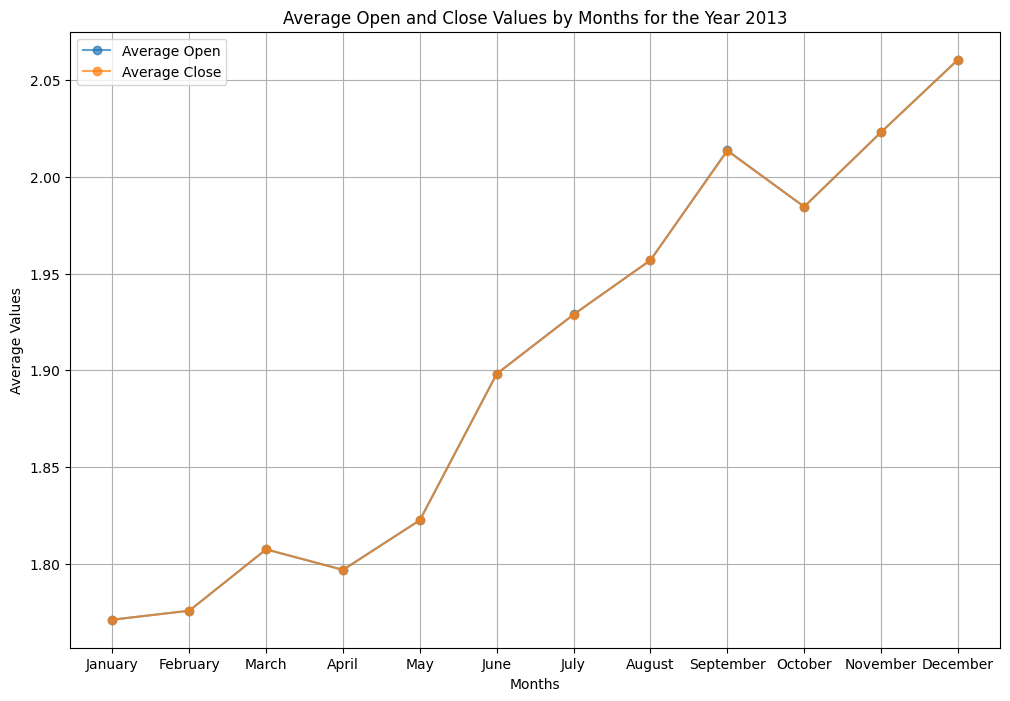

In [97]:
df_2013_1 = df[df['Year'] == 2013]

average_values = df_2013_1.groupby('Month')[['Open', 'Close']].mean().reset_index()

plt.figure(figsize=(12, 8))

plt.plot(average_values['Month'], average_values['Open'], marker='o', alpha= 0.7, label='Average Open')
plt.plot(average_values['Month'], average_values['Close'], marker='o', alpha= 0.7, label='Average Close')

plt.xlabel('Months')
plt.ylabel('Average Values')
plt.title('Average Open and Close Values by Months for the Year 2013')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'])
plt.legend()
plt.grid(True)

plt.show()

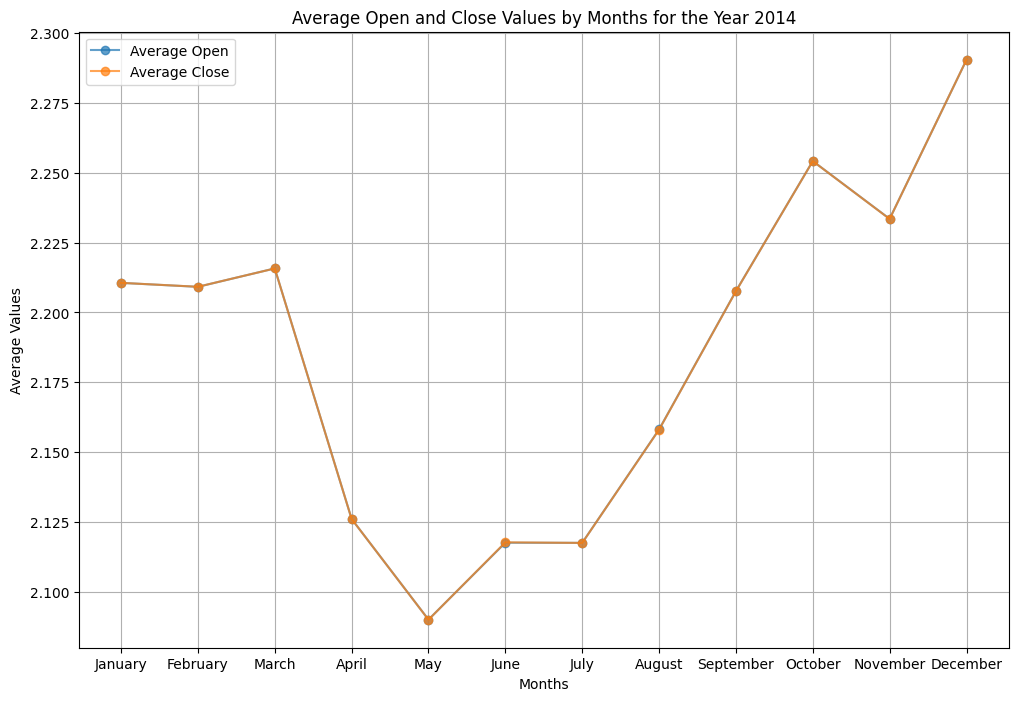

In [98]:
df_2014_1 = df[df['Year'] == 2014]

average_values = df_2014_1.groupby('Month')[['Open', 'Close']].mean().reset_index()

plt.figure(figsize=(12, 8))

plt.plot(average_values['Month'], average_values['Open'], marker='o', alpha= 0.7, label='Average Open')
plt.plot(average_values['Month'], average_values['Close'], marker='o', alpha= 0.7, label='Average Close')

plt.xlabel('Months')
plt.ylabel('Average Values')
plt.title('Average Open and Close Values by Months for the Year 2014')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'])
plt.legend()
plt.grid(True)

plt.show()

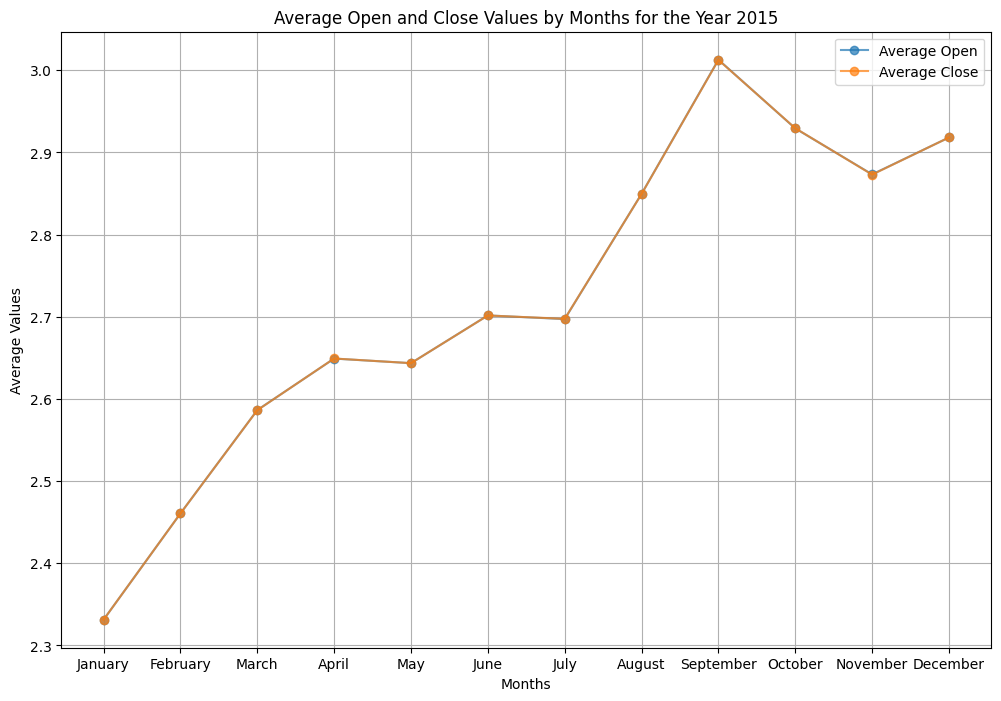

In [99]:
df_2015_1 = df[df['Year'] == 2015]

average_values = df_2015_1.groupby('Month')[['Open', 'Close']].mean().reset_index()

plt.figure(figsize=(12, 8))

plt.plot(average_values['Month'], average_values['Open'], marker='o', alpha= 0.7, label='Average Open')
plt.plot(average_values['Month'], average_values['Close'], marker='o', alpha= 0.7, label='Average Close')

plt.xlabel('Months')
plt.ylabel('Average Values')
plt.title('Average Open and Close Values by Months for the Year 2015')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'])
plt.legend()
plt.grid(True)

plt.show()

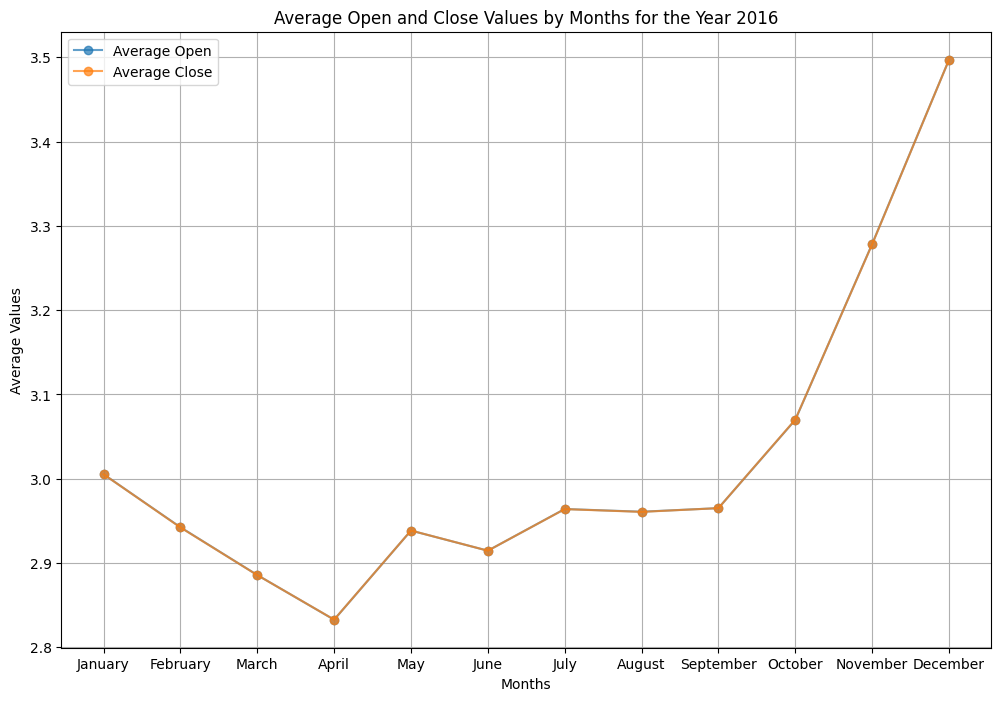

In [100]:
df_2016_1 = df[df['Year'] == 2016]

average_values = df_2016_1.groupby('Month')[['Open', 'Close']].mean().reset_index()

plt.figure(figsize=(12, 8))

plt.plot(average_values['Month'], average_values['Open'], marker='o', alpha= 0.7, label='Average Open')
plt.plot(average_values['Month'], average_values['Close'], marker='o', alpha= 0.7, label='Average Close')

plt.xlabel('Months')
plt.ylabel('Average Values')
plt.title('Average Open and Close Values by Months for the Year 2016')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'])
plt.legend()
plt.grid(True)

plt.show()

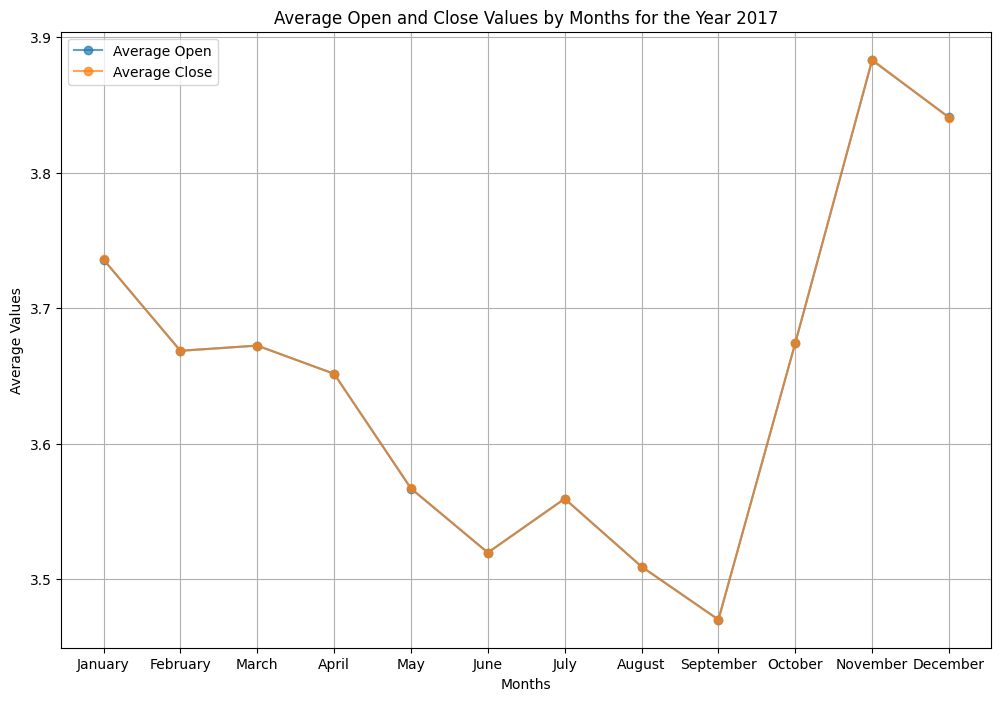

In [101]:
df_2017_1 = df[df['Year'] == 2017]

average_values = df_2017_1.groupby('Month')[['Open', 'Close']].mean().reset_index()

plt.figure(figsize=(12, 8))

plt.plot(average_values['Month'], average_values['Open'], marker='o', alpha= 0.7, label='Average Open')
plt.plot(average_values['Month'], average_values['Close'], marker='o', alpha= 0.7, label='Average Close')

plt.xlabel('Months')
plt.ylabel('Average Values')
plt.title('Average Open and Close Values by Months for the Year 2017')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'])
plt.legend()
plt.grid(True)

plt.show()

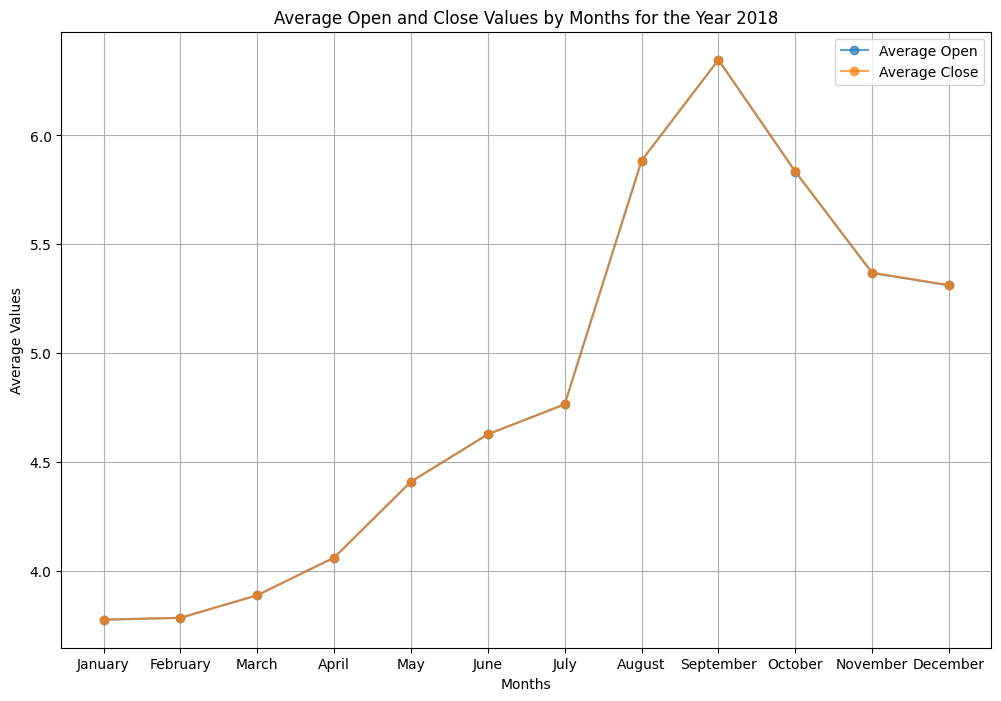

In [102]:
df_2018_1 = df[df['Year'] == 2018]

average_values = df_2018_1.groupby('Month')[['Open', 'Close']].mean().reset_index()

plt.figure(figsize=(12, 8))

plt.plot(average_values['Month'], average_values['Open'], marker='o', alpha= 0.7, label='Average Open')
plt.plot(average_values['Month'], average_values['Close'], marker='o', alpha= 0.7, label='Average Close')

plt.xlabel('Months')
plt.ylabel('Average Values')
plt.title('Average Open and Close Values by Months for the Year 2018')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'])
plt.legend()
plt.grid(True)

plt.show()

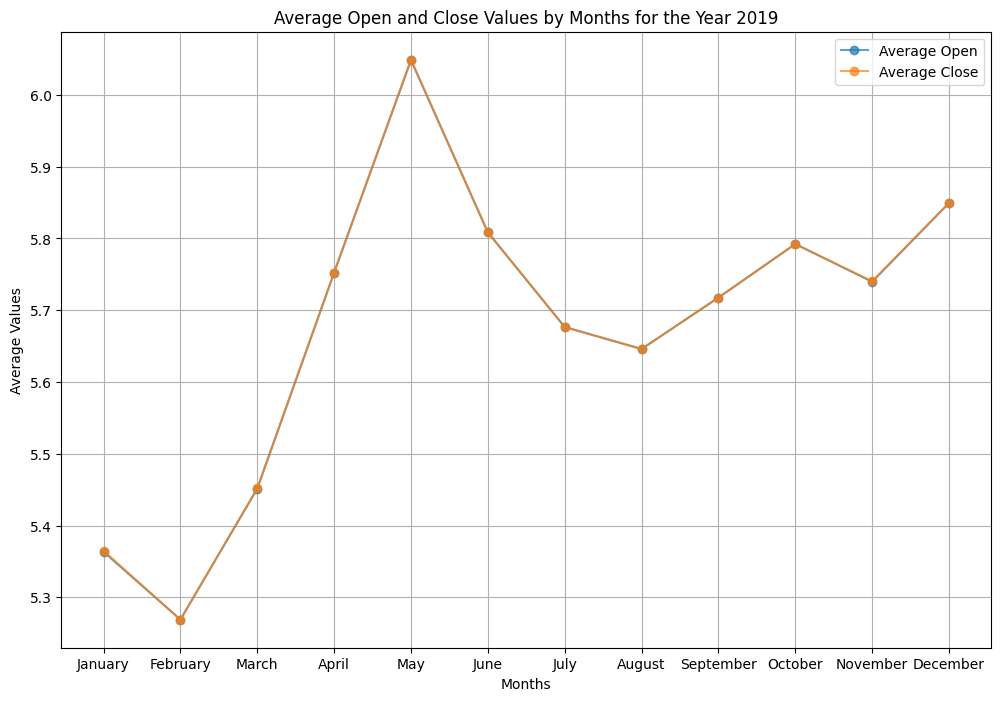

In [103]:
df_2019_1 = df[df['Year'] == 2019]

average_values = df_2019_1.groupby('Month')[['Open', 'Close']].mean().reset_index()

plt.figure(figsize=(12, 8))

plt.plot(average_values['Month'], average_values['Open'], marker='o', alpha= 0.7, label='Average Open')
plt.plot(average_values['Month'], average_values['Close'], marker='o', alpha= 0.7, label='Average Close')

plt.xlabel('Months')
plt.ylabel('Average Values')
plt.title('Average Open and Close Values by Months for the Year 2019')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'])
plt.legend()
plt.grid(True)

plt.show()

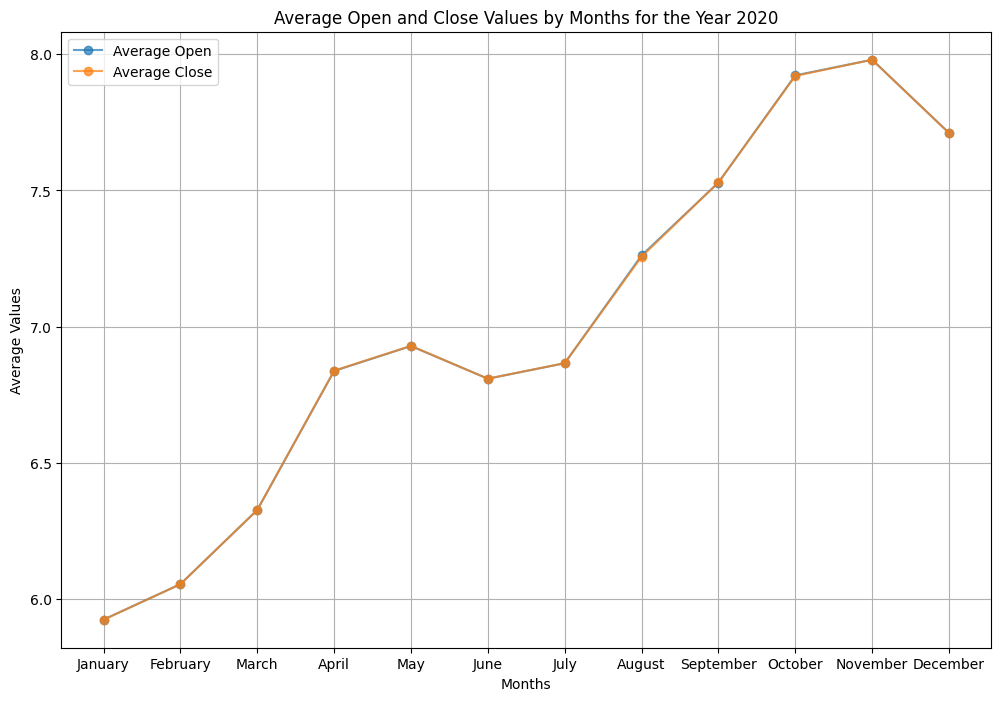

In [104]:
df_2020_1 = df[df['Year'] == 2020]

average_values = df_2020_1.groupby('Month')[['Open', 'Close']].mean().reset_index()

plt.figure(figsize=(12, 8))

plt.plot(average_values['Month'], average_values['Open'], marker='o', alpha= 0.7, label='Average Open')
plt.plot(average_values['Month'], average_values['Close'], marker='o', alpha= 0.7, label='Average Close')

plt.xlabel('Months')
plt.ylabel('Average Values')
plt.title('Average Open and Close Values by Months for the Year 2020')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'])
plt.legend()
plt.grid(True)

plt.show()

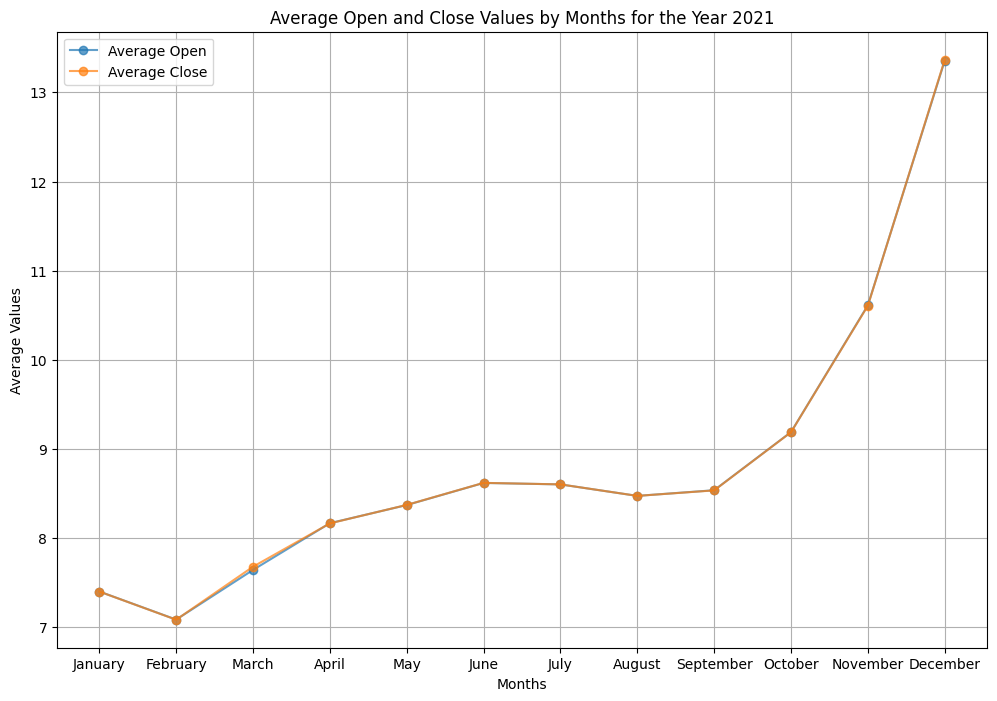

In [105]:
df_2021_1 = df[df['Year'] == 2021]

average_values = df_2021_1.groupby('Month')[['Open', 'Close']].mean().reset_index()

plt.figure(figsize=(12, 8))

plt.plot(average_values['Month'], average_values['Open'], marker='o', alpha= 0.7, label='Average Open')
plt.plot(average_values['Month'], average_values['Close'], marker='o', alpha= 0.7, label='Average Close')

plt.xlabel('Months')
plt.ylabel('Average Values')
plt.title('Average Open and Close Values by Months for the Year 2021')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'])
plt.legend()
plt.grid(True)

plt.show()

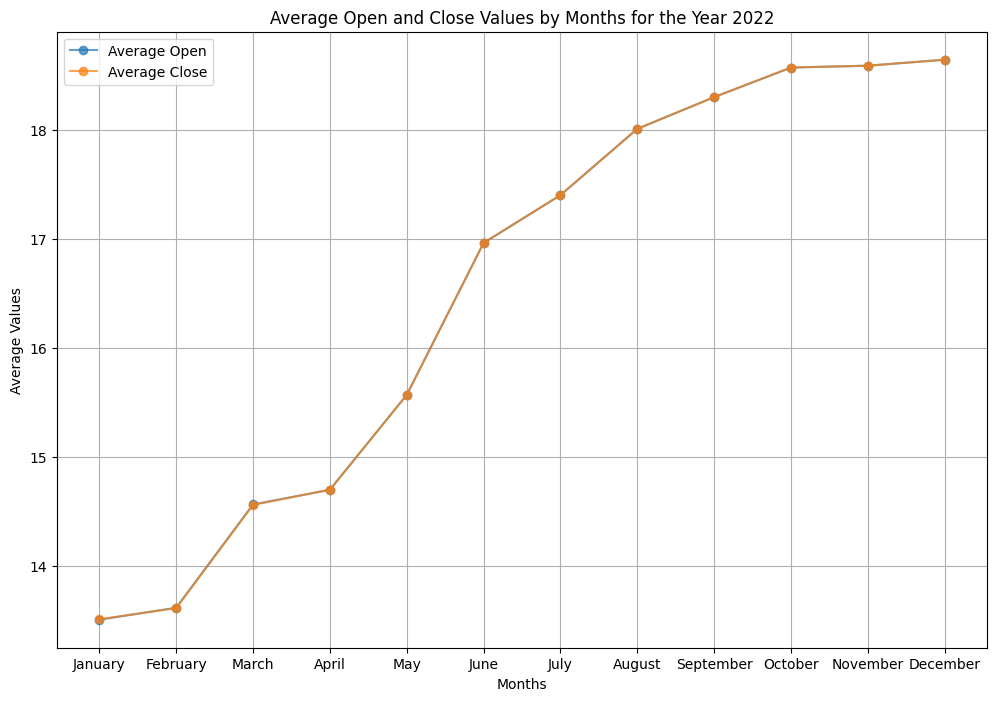

In [106]:
df_2022_1 = df[df['Year'] == 2022]

average_values = df_2022_1.groupby('Month')[['Open', 'Close']].mean().reset_index()

plt.figure(figsize=(12, 8))

plt.plot(average_values['Month'], average_values['Open'], marker='o', alpha= 0.7, label='Average Open')
plt.plot(average_values['Month'], average_values['Close'], marker='o', alpha= 0.7, label='Average Close')

plt.xlabel('Months')
plt.ylabel('Average Values')
plt.title('Average Open and Close Values by Months for the Year 2022')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'])
plt.legend()
plt.grid(True)

plt.show()

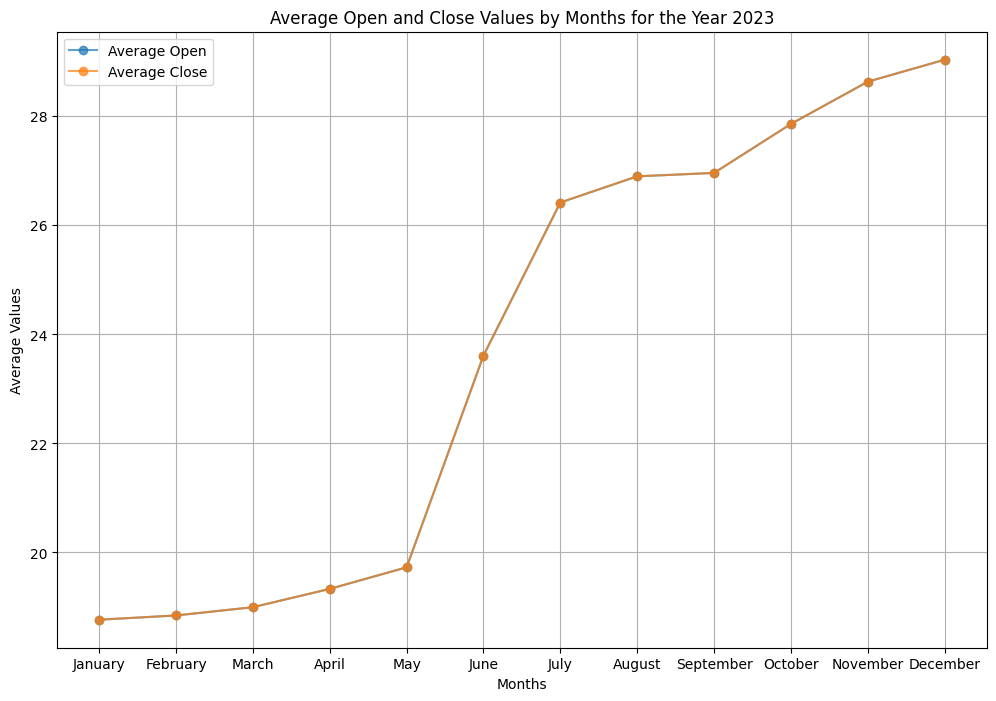

In [107]:
df_2023_1 = df[df['Year'] == 2023]

average_values = df_2023_1.groupby('Month')[['Open', 'Close']].mean().reset_index()

plt.figure(figsize=(12, 8))

plt.plot(average_values['Month'], average_values['Open'], marker='o', alpha= 0.7, label='Average Open')
plt.plot(average_values['Month'], average_values['Close'], marker='o', alpha= 0.7, label='Average Close')

plt.xlabel('Months')
plt.ylabel('Average Values')
plt.title('Average Open and Close Values by Months for the Year 2023')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',  'December'])
plt.legend()
plt.grid(True)

plt.show()

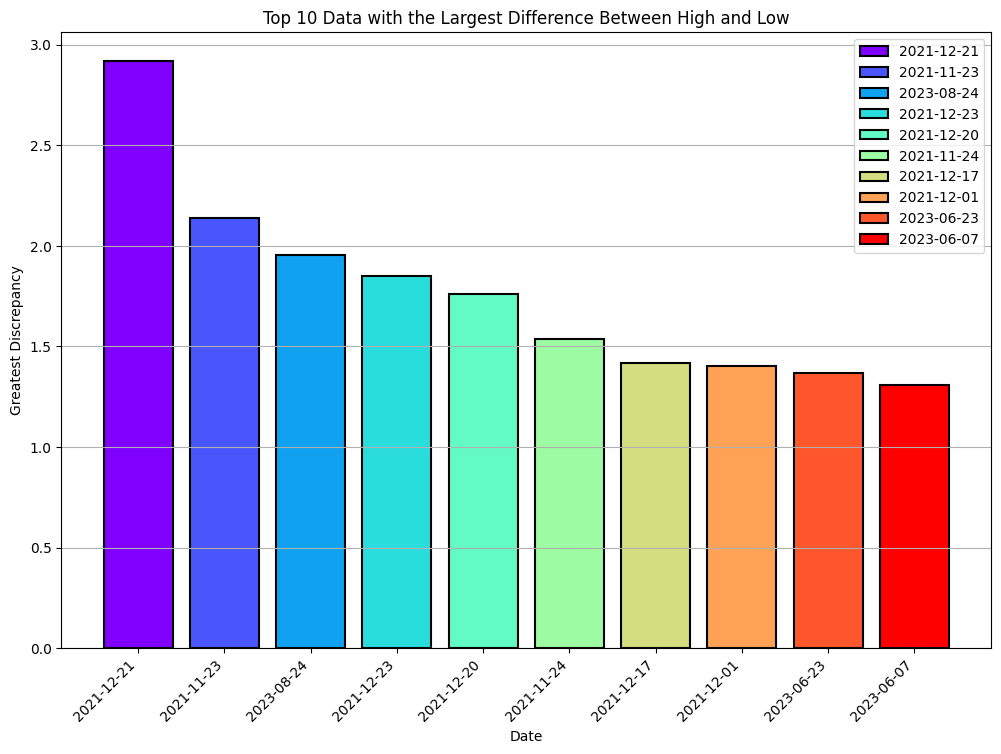

In [108]:
df['High_Low_Difference'] = df['High'] - df['Low']

df['Date'] = pd.to_datetime(df['Date'])

top_10_differences = df.nlargest(10, 'High_Low_Difference')

colors = plt.cm.rainbow(np.linspace(0, 1, len(top_10_differences)))

plt.figure(figsize=(12, 8))

for i, (date, diff, color) in enumerate(zip(top_10_differences['Date'], top_10_differences['High_Low_Difference'], colors)):
    plt.bar(i, diff, color=color, edgecolor='black', linewidth=1.5, label=date.strftime('%Y-%m-%d'))

plt.xticks(range(len(top_10_differences)), [date.strftime('%Y-%m-%d') for date in top_10_differences['Date']], rotation=45, ha='right')

plt.xlabel('Date')
plt.ylabel('Greatest Discrepancy')
plt.title('Top 10 Data with the Largest Difference Between High and Low')
plt.legend()
plt.grid(axis='y')

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15224\1683467147.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


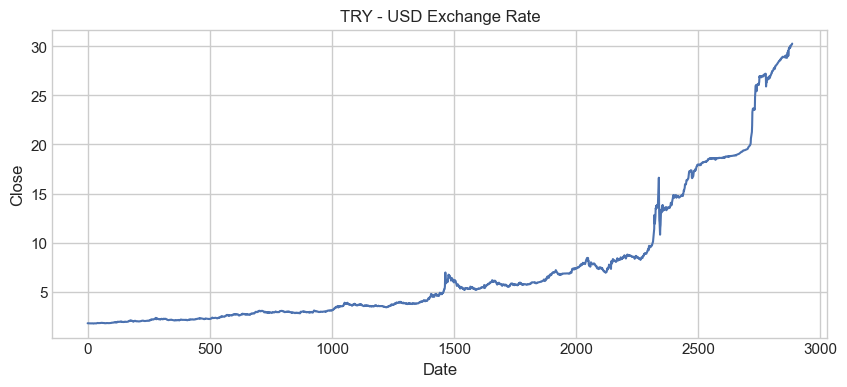

In [109]:
sns.set()
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 4))
plt.title("TRY - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(df["Close"])
plt.show()

           Open      High       Low     Close
Open   1.000000  0.999902  0.999919  0.999997
High   0.999902  1.000000  0.999802  0.999905
Low    0.999919  0.999802  1.000000  0.999917
Close  0.999997  0.999905  0.999917  1.000000


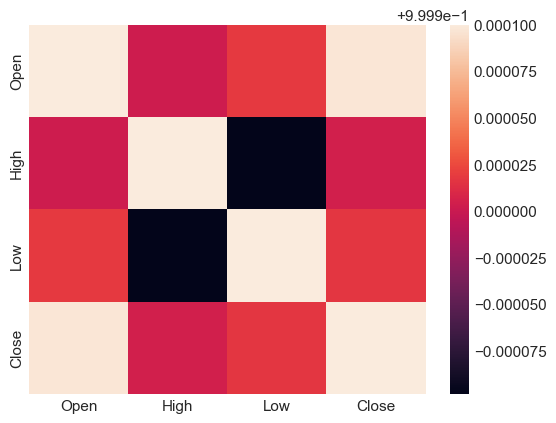

In [110]:
print(df[["Open","High","Low","Close"]].corr())
sns.heatmap(df[["Open","High","Low","Close"]].corr())
plt.show()

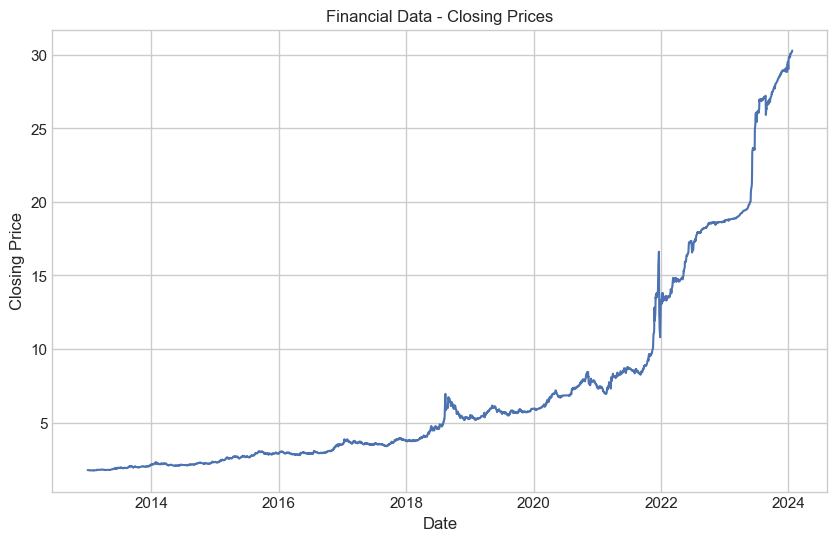

In [111]:
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df['Close'])
plt.title('Financial Data - Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

### <span style="color:dodgerblue">Model Creation</span>

In [112]:
model = ARIMA(df['Close'], order=(5, 1, 2))

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


### <span style="color:dodgerblue">Model Training</span>

In [113]:
results = model.fit()

### <span style="color:dodgerblue">Model Testing</span>

In [114]:
forecast_steps = 5
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='B')[1:]
forecast_values = forecast.predicted_mean

actual_values = df['Close'][-forecast_steps:]

mse = mean_squared_error(actual_values, forecast_values)
mae = mean_absolute_error(actual_values, forecast_values)

print("Mean Squared Error (MSE):", mse)
print("Ortalama Mutlak Hata (MAE):", mae)

Mean Squared Error (MSE): 0.01470617702037949
Ortalama Mutlak Hata (MAE): 0.1059708573018483


### <span style="color:dodgerblue">Visualization of Model Predictions</span>

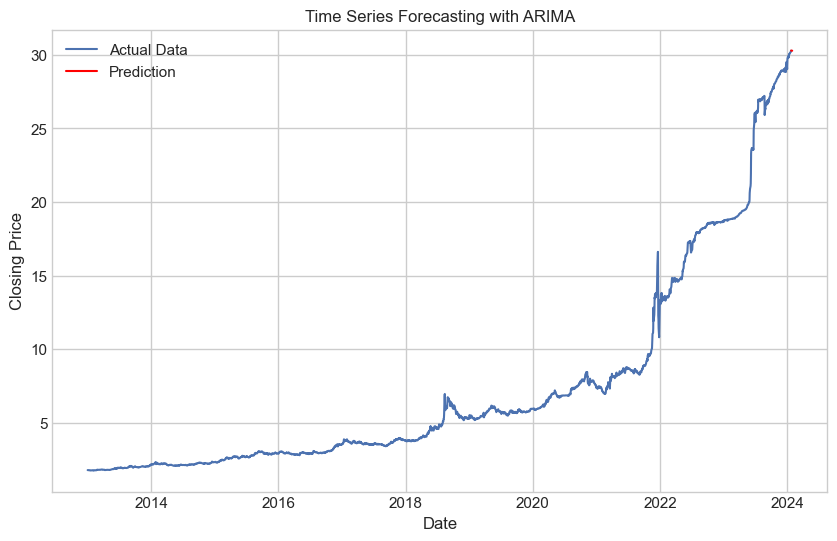

In [115]:
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Actual Data')
plt.plot(forecast_index, forecast_values, color='red', label='Prediction')
plt.title('Time Series Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

### <span style="color:dodgerblue">Model Predictions</span>

In [118]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,High_Low_Difference
Date,,,,,,,,,,
2013-01-01,1.781800,1.781800,1.781800,1.781800,1.781800,0.0,2013,1,1,0.000000
2013-01-02,1.781400,1.782000,1.774000,1.781400,1.781400,0.0,2013,1,2,0.008000
2013-01-03,1.777780,1.782500,1.776480,1.777780,1.777780,0.0,2013,1,3,0.006020
2013-01-04,1.785600,1.790530,1.783640,1.784200,1.784200,0.0,2013,1,4,0.006890
2013-01-07,1.780580,1.786240,1.779000,1.780480,1.780480,0.0,2013,1,7,0.007240
...,...,...,...,...,...,...,...,...,...,...
2024-01-17,30.118099,30.137100,30.093639,30.118099,30.118099,0.0,2024,1,17,0.043461
2024-01-18,30.137819,30.193399,30.120899,30.137819,30.137819,0.0,2024,1,18,0.072500
2024-01-19,30.153601,30.196899,30.129629,30.153601,30.153601,0.0,2024,1,19,0.067270


In [116]:
print("Forecast Values with ARIMA:")
print(forecast_values)

Forecast Values with ARIMA:
2024-01-24    30.284164
2024-01-25    30.284246
2024-01-26    30.283919
2024-01-29    30.278134
2024-01-30    30.274689
Freq: B, Name: predicted_mean, dtype: float64


### <span style="color:dodgerblue">Results</span>

- After 2021, the USD currency has shown a more significant increase against the TRY currency.
- Generally, there is more market activity at the end and beginning of each year.
- The USD currency tends to rise against the TRY currency.
- The highest increases occurred in the years 2021 and 2023.
- The difference between the opening and closing prices has not exceeded 3 in any year.
- In December 2021, the USD currency showed the highest increase against the TRY currency.
- At the beginning of 2013, the USD currency was 1.782 against the TRY currency.
- Towards the end of the first month of 2024, the USD currency was 30.275 against the TRY currency.

### <span style="color:dodgerblue">Recommendations</span>

1- Careful Market Monitoring:

The significant increase of USD against TRY after 2021 may be a signal to evaluate potential opportunities in the market. Monitor market trends closely.

2- Focus on Timing:

Year-end and year-beginning periods tend to have increased market activity. It's important to anticipate possible price fluctuations during these times and position accordingly.

3- Investment Strategy for USD/TRY Pair:

Considering the general upward trend of USD against TRY, formulate a careful investment strategy.
Consider long-term investment or short-term speculation strategies for the USD/TRY pair.

4- Risk Management:

Given that the highest increases occurred in 2021 and 2023, review your risk management strategies and use stop-loss orders.

5- Opening and Closing Prices:

The fact that the difference between opening and closing prices has not exceeded 3 in any year indicates market stability. Evaluate risks and potential returns considering this.

6- December 2021 Event:

The highest increase of USD against TRY in December 2021 indicates an important event during that period. Attempt to understand the factors and events influencing this time frame, as it might help in predicting similar situations in the future.

7- Strategy Based on Historical Data:

The USD/TRY rate in 2013 and at the end of the first month of 2024 can help in formulating a strategy based on historical data.

8- Consultation with a Forex Expert:

Seek advice from a financial expert tailored to current market conditions. Professional opinions can assist in making more informed investment decisions.

9- Monitoring News and Economic Indicators:

Keep track of central bank decisions, economic indicators, and other significant news. These factors can have an impact on currency exchange rates.

10- Training with Demo Accounts:

Use demo accounts to gain experience in forex trading. Testing your strategies without risking real money can lead to more robust decision-making.